# Generative Models: GANs

In [1]:
from IPython.core.display import HTML

# I. What is a GAN ?

## I.1 Definition

> **Big Picture** : Generative Adversarial Networks (GANs) are deep learning architectures made of 2 Neural Nets, fighting one against the other. 

- A first network is train to take a random input and try to make it look like our target data.

- A second network is trained to recognize the fake inputs from the true inputs. 

We use the fact that these 2 networks fight against one another to learn the distribution of the input data and generate new data samples. Thus, GANs are said to be a **generative model**.

Therefore, GANs are able to generate :
- faces
- images
- videos
- voices
- data
- and even art...

Concretely, you can apply GANs to :
- Font generation
- Anime character generation
- Interactive Image generation
- Text2Image (text to image)
- 3D Object generation
- Image Editing
- Face Aging
- Human Pose Estimation
- Domain-transfer (e.g. style-transfer, pix2pix, sketch2image)
- Image Inpainting (hole filling)
- Super-resolution
- High-resolution image generation (large-scale image)
- Adversarial Examples (Defense vs Attack)
- Visual Saliency Prediction (attention prediction)
- Object Detection/Recognition
- Robotics
- Video (generation/prediction)
- Synthetic Data Generation
- Upscaling old 2D video games to 4K resolution
- ...


## I.2 Illustration

**1)** Some art generated by GANs, from the Art and Artificial Intelligence Laboratory, Rutgers University, and sold for 432'000 $

<img src="images/art.png">

**2)** Faces generated by GANs. None of these people actually exist. These faces were generated on https://www.thispersondoesnotexist.com/

<img src="images/faces.png">

**3)** Anime characters generated by NVIDIA using the algorithm StyleGAN

<img src="images/anime.png">

**4)** GAN-Generated Music by Aiva

In [2]:
%%html
<iframe width="100%" height="166" scrolling="no" frameborder="no" allow="autoplay" src="https://w.soundcloud.com/player/?url=https%3A//api.soundcloud.com/tracks/522141435&color=%23ff5500&auto_play=false&hide_related=false&show_comments=true&show_user=true&show_reposts=false&show_teaser=true"></iframe>

**5)** GAN for data generation

https://poloclub.github.io/ganlab/

...

## I.3 History

- 1959 : The general idea of learning via competition between players dates back to at least 1959. **Arthur Samuel**, demonstrated that algorithms could learn to play checkers via adversarial self-play.

- 1992 : Works by Jürgen Schmidhuber on Predictibility Minimization, a form of Adversarial Networks https://youtu.be/HGYYEUSm-0Q?t=3779

- 2014 : Ian Goodfellow is recognized by several sources as having **invented GANs** in 2014. His paper included the first working implementation of a generative model based on adversarial networks, as well as game theoretic analysis establishing that the method is sound.
https://arxiv.org/abs/1406.2661

- 2017 : A GAN was used for **image enhancement** focusing on realistic textures rather than pixel-accuracy, producing a higher image quality at high magnification.

- 2017 : The first **faces** were generated. These were exhibited in February 2018 at the Grand Palais.

- 2017 : GAN technology began to make its presence felt in the **fine arts** arena with the appearance of a newly developed implementation which was said to have crossed the threshold of being able to generate unique and appealing abstract paintings, and thus dubbed a "CAN", for "creative adversarial network".

- 2018 : A GAN system was used to create the 2018 **painting** Edmond de Belamy, which sold for 432'500 USD

- 2019 : Researchers at Samsung demonstrated a GAN-based system that produces **videos of a person** speaking given only a single photo of that person.

<img src='images/facebook.png'>

# II. How do GANs work ?

GANs are used to Generate data that follow a target distribution, from a random input.

<img src='images/GANprinciple.png'>

GANs are based on the notion of Adversarial Training. Adversarial training is a technique employed in the field of machine learning which attempts to fool models through malicious input.

## II.1 Generative networks

There are 2 main ways to generate data :
- by directly comparing the generated data and the input data :  Generative Matching Networks
- by indirectly comparing the generated data and the input data : Generative Adversarial Networks

### Generative Matching Networks

Generative Matching Networks is a category of algorithms made of :
- Generative Moments Matching Networks
- Generative Features Matching Networks

We **compare the true and the generated probability distributions** and backpropagating the difference (the error) through the network.

<img src='images/GMN.png'>

Note, we usually compute the error by Maximum Mean Discrepancy.

### Generative Adversarial Networks

> In GANs, we don't compute the error directly. We train a discriminator to recognize the true and the generated images.

GANs are made of 2 Neural Nets :
- A Generator : `G(z)`
- A Discriminator : `D(x)`

We have in a sense, 2 inputs :
- Real data
- Generated data (by the Generator)

We try to :
- train the discriminator to recognize real data and generated data,
- train the generator to make generated data look like real data

<img src='images/GANschema.png'>

In adversarial training, both networks try to beat each other and, doing so, they are both becoming better and better.

#### Architecture Overview

<img src='images/GANs.png'>

## II.2 The Discriminator

> If you input a `x` data point through `D(x)`, it will output a value between 0 and 1, which is the probability that `x` is from the original dataset.

If we successfully manage to generate data that look like the input data, our discriminator should have issues telling which image is real or fake. In this sense, we expect the probability that it outputs to tend to 0.5.

In [ ]:
def discriminator():
    
    img = Input(shape=img_shape)
    
    # Create the sequential model
    model = Sequential()
    
    # Flatten the images taken as inputs
    model.add(Flatten(input_shape=img_shape))
    
    # First layer
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))

    # Many layers ...
    
    model.add(Dense(1, activation='sigmoid'))

    # Get result
    validity = model(img)
    
    return Model(img, validity)

<img src='images/disc.png'>

## II.3 The Generator

> The Generator `G(z)` takes as input a noise vector, called `z`. Then, the generator learns to output a generated data from this noise input. The output of G(z) is a matrix whose dimensions are equal to the true inputs. 

Ideally, we want `G(z)` to output matrices which are indistinguishable from the original data (x) distribution.

In [ ]:
def generator():

    # Input Data
    noise_shape = (100,)
    noise = Input(shape=noise_shape)
    
    # Create the sequential model
    model = Sequential()

    # Build the first layer
    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    # Many layers...
    
    # Flatten and reshape
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    # Get result
    img = model(noise)
    
    return Model(noise, img)

<img src='images/gen.png'>

#### Practical considerations :

Here's some practical considerations for building your first GAN :
- Usually the discriminator “wins”
- Usually D is bigger and deeper than G
- Sometimes train D more often than G.
- Do not try to limit D to avoid making it “too smart” 
- Use gaussian distribution for input Noise
- Use non-saturating functions (ReLu, MaxPool)
- Use Soft and Noisy Labels

## II.3 A bit of Maths

The loss function in GANs is the following : 

<img src='images/eq2.png'>

What does it mean ?

- We train **D** to **maximize** the probability of assigning the correct label to both training examples and samples from G. 
- We simultaneously train **G** to **minimize** `(1 − D(G(z)))`

In other words, D and G play a two-player **minimax** game with value function `V(G, D)`

<img src='images/eq3.png'>

- Optimizing D is computationally prohibitive, and on finite datasets would result in overfitting. 
- Instead, we alternate between `k` steps of optimizing D and `one` step of optimizing G. 

This results in D being maintained near its optimal solution, while G changes slowly.

<img src='images/process.png'>

# III. How to train a GAN ?

A full list of useful recommendations can be found here : https://github.com/soumith/ganhacks

New papers are constantly coming out, but here's a general list of recommendations to train a GAN :
- Normalize the inputs
- In GAN papers, the loss function to optimize G is : min (log 1-D), but in practice we practically use : max log D
- Sample input data from a Gaussian distribution rather than a uniform one
- Construct different mini-batches for real and fake, i.e. each mini-batch needs to contain only all real images or all generated images
- Avoid Sparse gradients such as Relu and Maxpool. LeakyRelu is good for both the generator and the discriminator.
    - For Downsampling, use: Average Pooling, Conv2d + stride
    - For Upsampling, use: PixelShuffle, ConvTranspose2d + stride
- Soft and Noisy labels : If you have two target labels: Real=1 and Fake=0, then for each incoming sample, if it is real, then replace the label with a random number between 0.7 and 1.2, and if it is a fake sample, replace it with 0.0 and 0.3 (for example).
- Use Stochastic Gradient Descent for the discriminator and ADAM for the generator


# IV. Types and variations of GANs

As you might guess, since GANs are really recent, there's an expending and active litterature on this topic. What we covered so far is only the basis of GANs. In this section, we'll cover some extensions and twists of GANs, what they bring and what they can be used for. There are many, many, many types of GANs, including :   
- Auxiliary Classifier Generative Adversarial Network
- Adversarial Autoencoder
- Bidirectional GAN
- Boundary-Seeking GAN
- Conditional GAN
- Context-Conditional GAN
- CycleGAN
- Deep Convolutional GAN
- Semi-Supervised GAN
- ...


We obviously won't cover all of them, but here are the major improvments to classical GANs.

## IV.1 StarGAN and InfoGAN

https://arxiv.org/pdf/1711.09020.pdf

> StarGANs give non-random inputs to a GAN (i.e an image), and learn multiple mapping at a time to avoid overfitting, 

We call the fact of feeding an information input instead of noise an **InfoGAN**.

StarGANs are implemented in PyTorch. Pre-trained models exist in the context of face features generation (Blond, Brunette, but also emotions like happiness or sadness).

<img src='images/star.png'>

## IV.2 Deep Convolutional GANs

https://arxiv.org/pdf/1511.06434.pdf

> DCGANs are an improvement of GANs and use CNNs instead of systematically using Dense networks.

They are more stable and generate higher quality images, since they use CNNs. In DCGAN, **batch normalization** is done in **both networks**, i.e the generator network and the discriminator network. They can be used for style transfer. For example, you can use a dataset of handbags to generate shoes in the same style as the handbags.

<img src='images/bags.png'>

## IV.3 Conditional GANs (pix2pix)

https://arxiv.org/pdf/1411.1784.pdf

> Generative adversarial nets can be extended to a conditional model if both the generator and discriminator are conditioned on some extra information y, for example a label.

These GANs use extra label information and result in better quality images and are able to control how generated images will look.

<img src='images/cgans.png'>

## IV.4 StackGAN

https://arxiv.org/pdf/1612.03242.pdf
    
StackGANs synthetize high-quality images from text descriptions in computer vision. They propose Stacked Generative Adversarial Networks (StackGAN) to generate 256x256 photo-realistic images conditioned on text descriptions.

<img src='images/sgans.png'>

## IV.5 Least Square GAN (LSGAN)

https://arxiv.org/pdf/1611.04076.pdf

Regular GANs may lead to the vanishing gradients problem, which therefore slows the learning process.

LSGAN attempts to overcome this problem by adopting the least squares loss function instead of the sigmoid cross entropy loss for the discriminator.

## IV.6 Auxiliary Classifier GAN (ACGAN)

https://arxiv.org/pdf/1610.09585.pdf

In ACGAN’s, every generated sample has a corresponding class label C in addition to the noise Z.

G uses both to generate images : $X=G(C,Z)$. The discriminator gives both a probability distribution over sources and a probability distribution over the class labels.

Authors demonstrate that adding more structure to the GAN latent space along with a specialized cost function results in higher quality samples.

# V. Application: digits generation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train, _), (_, _) = mnist.load_data()

# Some useful variables
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

# Rescale
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

In [4]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [5]:
def build_generator():
    # Input Data
    noise_shape = (100,)
    noise = Input(shape=noise_shape)
    
    # Create the sequential model
    model = Sequential()
    # Build the first layer
    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    # Second layer
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    # Third layer
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    # Flatten and reshape
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    # Get model summary
    img = model(noise)
    model.summary()

    return Model(noise, img)

Generator compilation

In [6]:
optimizer = Adam(0.0002, 0.5)
generator = build_generator()
generator.compile(
    loss='mse', 
    optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [7]:
def build_discriminator():
    img = Input(shape=img_shape)

    # Create the sequential model
    model = Sequential()
    # Flatten the images taken as inputs
    model.add(Flatten(input_shape=img_shape))
    # First layer
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    # Second layer
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    # Last layer, return either 0 or 1
    model.add(Dense(1, activation='sigmoid'))
    # Get model summary
    validity = model(img)
    model.summary()
    
    return Model(img, validity)

Compile the discriminator

In [8]:
discriminator = build_discriminator()
discriminator.compile(
            loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

Finally build the GAN model:

In [9]:
# 1. Declare input of size (100, )
z = Input(shape=(100,))

# 2. Define the generated image from the input
img = generator(z)

# 3. Define the output from the image
valid = discriminator(img)

# For the combined model, only train the generator
discriminator.trainable = False

# 4.Combined model
combined = Model(z, valid)

# Once created, we compile the model
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

combined.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
model (Model)                (None, 28, 28, 1)         1493520   
_________________________________________________________________
model_1 (Model)              (None, 1)                 533505    
Total params: 2,027,025
Trainable params: 1,489,936
Non-trainable params: 537,089
_________________________________________________________________


We define a function to save images from time to time below:

In [10]:
def save_imgs(epoch):
    
    # Predict from input noise
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    # Subplots
    fig, axs = plt.subplots(r, c)
    cnt = 0
    
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
 
    fig.savefig("images_gan/mnist_%d.png" % epoch)
    plt.close()

First of all, we set :
- the number of epochs the model will train to 15'000
- the batch size to 64
- the interval at which we save the images to 1000

In [11]:
epochs = 15000
batch_size = 64
save_interval = 1000
half_batch = int(batch_size / 2)

We make the directory to store the images if it does not exist

In [12]:
import os
if not os.path.isdir('images_gan'):
    os.mkdir('images_gan')

Finally train the GAN:

In [13]:
d_loss_hist = []
g_loss_hist = []
d_acc = []

for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------
    
    # Pick 50% of sample images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]

    # Generate 50% of new images
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator.predict(noise)
    
    
    # Train discriminator on real images with label 1
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    
    # Train discriminator on fake images with label 0
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    
    # Loss of discriminator = Mean of Real and Fake loss
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    d_loss_hist.append(d_loss[0])
    d_acc.append(d_loss[1])
    
    # ---------------------
    #  Train Generator
    # ---------------------

    # The generator wants the discriminator to label the generated samples as valid (ones)
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)

    # Train the generator
    g_loss = combined.train_on_batch(noise, valid_y)
    g_loss_hist.append(g_loss)
    
    # Print the progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
        
    if epoch % save_interval == 0:
        save_imgs(epoch)

0 [D loss: 0.948263, acc.: 10.94%] [G loss: 0.805472]
1 [D loss: 0.419802, acc.: 73.44%] [G loss: 0.764227]
2 [D loss: 0.353029, acc.: 82.81%] [G loss: 0.768435]
3 [D loss: 0.342196, acc.: 82.81%] [G loss: 0.813771]
4 [D loss: 0.324254, acc.: 89.06%] [G loss: 0.890087]
5 [D loss: 0.313378, acc.: 89.06%] [G loss: 0.972439]
6 [D loss: 0.261039, acc.: 100.00%] [G loss: 1.121199]
7 [D loss: 0.233785, acc.: 98.44%] [G loss: 1.238427]
8 [D loss: 0.209623, acc.: 100.00%] [G loss: 1.365157]
9 [D loss: 0.194541, acc.: 100.00%] [G loss: 1.467928]
10 [D loss: 0.147550, acc.: 100.00%] [G loss: 1.613710]
11 [D loss: 0.128626, acc.: 100.00%] [G loss: 1.765760]
12 [D loss: 0.113906, acc.: 100.00%] [G loss: 1.849161]
13 [D loss: 0.130988, acc.: 100.00%] [G loss: 1.979065]
14 [D loss: 0.104702, acc.: 100.00%] [G loss: 2.087738]
15 [D loss: 0.086741, acc.: 100.00%] [G loss: 2.189083]
16 [D loss: 0.067640, acc.: 100.00%] [G loss: 2.277357]
17 [D loss: 0.075497, acc.: 100.00%] [G loss: 2.426244]
18 [D los

148 [D loss: 0.226438, acc.: 87.50%] [G loss: 3.258250]
149 [D loss: 0.286157, acc.: 89.06%] [G loss: 2.778516]
150 [D loss: 0.074608, acc.: 100.00%] [G loss: 2.891925]
151 [D loss: 0.327743, acc.: 90.62%] [G loss: 2.918505]
152 [D loss: 0.105840, acc.: 98.44%] [G loss: 3.666712]
153 [D loss: 0.231741, acc.: 95.31%] [G loss: 2.868518]
154 [D loss: 0.122676, acc.: 96.88%] [G loss: 3.297846]
155 [D loss: 0.112056, acc.: 98.44%] [G loss: 3.235844]
156 [D loss: 0.159937, acc.: 98.44%] [G loss: 3.016310]
157 [D loss: 0.113373, acc.: 96.88%] [G loss: 3.123601]
158 [D loss: 0.257754, acc.: 90.62%] [G loss: 3.314758]
159 [D loss: 0.149619, acc.: 98.44%] [G loss: 2.943342]
160 [D loss: 0.365799, acc.: 76.56%] [G loss: 3.144272]
161 [D loss: 0.209230, acc.: 92.19%] [G loss: 3.721116]
162 [D loss: 1.148370, acc.: 51.56%] [G loss: 1.229002]
163 [D loss: 0.459706, acc.: 75.00%] [G loss: 3.224220]
164 [D loss: 0.055250, acc.: 100.00%] [G loss: 4.158070]
165 [D loss: 0.664184, acc.: 64.06%] [G loss: 

297 [D loss: 0.669041, acc.: 48.44%] [G loss: 0.610832]
298 [D loss: 0.668605, acc.: 50.00%] [G loss: 0.613716]
299 [D loss: 0.685173, acc.: 48.44%] [G loss: 0.618337]
300 [D loss: 0.672437, acc.: 46.88%] [G loss: 0.617985]
301 [D loss: 0.688706, acc.: 46.88%] [G loss: 0.617122]
302 [D loss: 0.671064, acc.: 50.00%] [G loss: 0.617070]
303 [D loss: 0.669210, acc.: 50.00%] [G loss: 0.624564]
304 [D loss: 0.670858, acc.: 48.44%] [G loss: 0.616868]
305 [D loss: 0.663980, acc.: 50.00%] [G loss: 0.616723]
306 [D loss: 0.681142, acc.: 48.44%] [G loss: 0.618178]
307 [D loss: 0.661033, acc.: 50.00%] [G loss: 0.626130]
308 [D loss: 0.662378, acc.: 50.00%] [G loss: 0.621402]
309 [D loss: 0.666681, acc.: 46.88%] [G loss: 0.626884]
310 [D loss: 0.674811, acc.: 48.44%] [G loss: 0.630103]
311 [D loss: 0.650830, acc.: 50.00%] [G loss: 0.633623]
312 [D loss: 0.675752, acc.: 45.31%] [G loss: 0.638037]
313 [D loss: 0.680046, acc.: 50.00%] [G loss: 0.635124]
314 [D loss: 0.656748, acc.: 50.00%] [G loss: 0.

445 [D loss: 0.647159, acc.: 53.12%] [G loss: 0.706576]
446 [D loss: 0.647772, acc.: 57.81%] [G loss: 0.682247]
447 [D loss: 0.635454, acc.: 51.56%] [G loss: 0.665315]
448 [D loss: 0.643939, acc.: 51.56%] [G loss: 0.656349]
449 [D loss: 0.670697, acc.: 50.00%] [G loss: 0.662044]
450 [D loss: 0.641380, acc.: 56.25%] [G loss: 0.681906]
451 [D loss: 0.640542, acc.: 53.12%] [G loss: 0.684111]
452 [D loss: 0.631556, acc.: 53.12%] [G loss: 0.683882]
453 [D loss: 0.652655, acc.: 60.94%] [G loss: 0.676457]
454 [D loss: 0.670583, acc.: 59.38%] [G loss: 0.665851]
455 [D loss: 0.638016, acc.: 56.25%] [G loss: 0.686889]
456 [D loss: 0.641772, acc.: 57.81%] [G loss: 0.700485]
457 [D loss: 0.631973, acc.: 56.25%] [G loss: 0.695754]
458 [D loss: 0.646458, acc.: 57.81%] [G loss: 0.683168]
459 [D loss: 0.628050, acc.: 59.38%] [G loss: 0.680891]
460 [D loss: 0.662250, acc.: 54.69%] [G loss: 0.659308]
461 [D loss: 0.653883, acc.: 51.56%] [G loss: 0.648198]
462 [D loss: 0.641644, acc.: 56.25%] [G loss: 0.

594 [D loss: 0.634812, acc.: 59.38%] [G loss: 0.766781]
595 [D loss: 0.622525, acc.: 65.62%] [G loss: 0.780353]
596 [D loss: 0.638181, acc.: 65.62%] [G loss: 0.774814]
597 [D loss: 0.633066, acc.: 71.88%] [G loss: 0.770466]
598 [D loss: 0.653237, acc.: 65.62%] [G loss: 0.769561]
599 [D loss: 0.636473, acc.: 57.81%] [G loss: 0.759285]
600 [D loss: 0.678397, acc.: 54.69%] [G loss: 0.720531]
601 [D loss: 0.640975, acc.: 59.38%] [G loss: 0.733490]
602 [D loss: 0.636116, acc.: 60.94%] [G loss: 0.738627]
603 [D loss: 0.641614, acc.: 62.50%] [G loss: 0.752541]
604 [D loss: 0.638141, acc.: 59.38%] [G loss: 0.753114]
605 [D loss: 0.642528, acc.: 60.94%] [G loss: 0.755965]
606 [D loss: 0.604948, acc.: 78.12%] [G loss: 0.756009]
607 [D loss: 0.624429, acc.: 70.31%] [G loss: 0.756323]
608 [D loss: 0.616860, acc.: 65.62%] [G loss: 0.735041]
609 [D loss: 0.611967, acc.: 71.88%] [G loss: 0.758634]
610 [D loss: 0.624455, acc.: 60.94%] [G loss: 0.779818]
611 [D loss: 0.630308, acc.: 64.06%] [G loss: 0.

741 [D loss: 0.669015, acc.: 51.56%] [G loss: 0.740411]
742 [D loss: 0.692364, acc.: 50.00%] [G loss: 0.767042]
743 [D loss: 0.673331, acc.: 57.81%] [G loss: 0.805916]
744 [D loss: 0.667902, acc.: 59.38%] [G loss: 0.786279]
745 [D loss: 0.701382, acc.: 56.25%] [G loss: 0.750070]
746 [D loss: 0.690757, acc.: 59.38%] [G loss: 0.781232]
747 [D loss: 0.662737, acc.: 56.25%] [G loss: 0.782773]
748 [D loss: 0.643138, acc.: 71.88%] [G loss: 0.742189]
749 [D loss: 0.655396, acc.: 57.81%] [G loss: 0.786719]
750 [D loss: 0.636304, acc.: 64.06%] [G loss: 0.812147]
751 [D loss: 0.690057, acc.: 51.56%] [G loss: 0.766375]
752 [D loss: 0.604825, acc.: 68.75%] [G loss: 0.824252]
753 [D loss: 0.641733, acc.: 64.06%] [G loss: 0.841452]
754 [D loss: 0.629357, acc.: 64.06%] [G loss: 0.815474]
755 [D loss: 0.640276, acc.: 70.31%] [G loss: 0.760402]
756 [D loss: 0.612429, acc.: 73.44%] [G loss: 0.784726]
757 [D loss: 0.617186, acc.: 67.19%] [G loss: 0.781487]
758 [D loss: 0.649104, acc.: 57.81%] [G loss: 0.

889 [D loss: 0.590490, acc.: 85.94%] [G loss: 0.881997]
890 [D loss: 0.586441, acc.: 82.81%] [G loss: 0.852306]
891 [D loss: 0.610252, acc.: 75.00%] [G loss: 0.831223]
892 [D loss: 0.634014, acc.: 64.06%] [G loss: 0.853902]
893 [D loss: 0.604028, acc.: 70.31%] [G loss: 0.849850]
894 [D loss: 0.598554, acc.: 75.00%] [G loss: 0.845549]
895 [D loss: 0.608415, acc.: 75.00%] [G loss: 0.818485]
896 [D loss: 0.657872, acc.: 57.81%] [G loss: 0.770742]
897 [D loss: 0.606721, acc.: 62.50%] [G loss: 0.805802]
898 [D loss: 0.632143, acc.: 62.50%] [G loss: 0.834080]
899 [D loss: 0.596238, acc.: 71.88%] [G loss: 0.849315]
900 [D loss: 0.630289, acc.: 68.75%] [G loss: 0.833258]
901 [D loss: 0.629382, acc.: 68.75%] [G loss: 0.853184]
902 [D loss: 0.608540, acc.: 71.88%] [G loss: 0.834899]
903 [D loss: 0.611382, acc.: 68.75%] [G loss: 0.808272]
904 [D loss: 0.624492, acc.: 68.75%] [G loss: 0.891679]
905 [D loss: 0.624106, acc.: 79.69%] [G loss: 0.890108]
906 [D loss: 0.610945, acc.: 70.31%] [G loss: 0.

1036 [D loss: 0.658352, acc.: 60.94%] [G loss: 0.859591]
1037 [D loss: 0.621567, acc.: 68.75%] [G loss: 0.818320]
1038 [D loss: 0.643791, acc.: 64.06%] [G loss: 0.808107]
1039 [D loss: 0.636735, acc.: 60.94%] [G loss: 0.850047]
1040 [D loss: 0.623779, acc.: 64.06%] [G loss: 0.816933]
1041 [D loss: 0.625233, acc.: 64.06%] [G loss: 0.836742]
1042 [D loss: 0.616240, acc.: 67.19%] [G loss: 0.855637]
1043 [D loss: 0.603210, acc.: 73.44%] [G loss: 0.863036]
1044 [D loss: 0.604210, acc.: 70.31%] [G loss: 0.889622]
1045 [D loss: 0.653518, acc.: 64.06%] [G loss: 0.861516]
1046 [D loss: 0.636086, acc.: 56.25%] [G loss: 0.850220]
1047 [D loss: 0.641427, acc.: 64.06%] [G loss: 0.870315]
1048 [D loss: 0.627264, acc.: 64.06%] [G loss: 0.863168]
1049 [D loss: 0.603939, acc.: 70.31%] [G loss: 0.888977]
1050 [D loss: 0.614559, acc.: 70.31%] [G loss: 0.889516]
1051 [D loss: 0.615703, acc.: 70.31%] [G loss: 0.877230]
1052 [D loss: 0.599046, acc.: 76.56%] [G loss: 0.850082]
1053 [D loss: 0.627446, acc.: 6

1181 [D loss: 0.640942, acc.: 70.31%] [G loss: 0.970868]
1182 [D loss: 0.566280, acc.: 76.56%] [G loss: 0.895247]
1183 [D loss: 0.611848, acc.: 68.75%] [G loss: 0.974731]
1184 [D loss: 0.571894, acc.: 75.00%] [G loss: 1.004477]
1185 [D loss: 0.697791, acc.: 57.81%] [G loss: 0.925490]
1186 [D loss: 0.579385, acc.: 68.75%] [G loss: 0.912049]
1187 [D loss: 0.648814, acc.: 59.38%] [G loss: 0.865521]
1188 [D loss: 0.638334, acc.: 59.38%] [G loss: 0.896624]
1189 [D loss: 0.597694, acc.: 67.19%] [G loss: 0.911796]
1190 [D loss: 0.593852, acc.: 70.31%] [G loss: 0.903861]
1191 [D loss: 0.664455, acc.: 57.81%] [G loss: 0.907093]
1192 [D loss: 0.592661, acc.: 68.75%] [G loss: 0.939865]
1193 [D loss: 0.583801, acc.: 75.00%] [G loss: 0.975876]
1194 [D loss: 0.562758, acc.: 75.00%] [G loss: 1.009782]
1195 [D loss: 0.644171, acc.: 64.06%] [G loss: 0.943627]
1196 [D loss: 0.710688, acc.: 46.88%] [G loss: 0.878147]
1197 [D loss: 0.634868, acc.: 59.38%] [G loss: 0.864734]
1198 [D loss: 0.608081, acc.: 7

1327 [D loss: 0.626851, acc.: 62.50%] [G loss: 0.902383]
1328 [D loss: 0.565569, acc.: 75.00%] [G loss: 0.971474]
1329 [D loss: 0.657131, acc.: 64.06%] [G loss: 0.922745]
1330 [D loss: 0.546614, acc.: 78.12%] [G loss: 0.939931]
1331 [D loss: 0.578902, acc.: 73.44%] [G loss: 0.945097]
1332 [D loss: 0.644194, acc.: 56.25%] [G loss: 0.920028]
1333 [D loss: 0.567178, acc.: 79.69%] [G loss: 0.870787]
1334 [D loss: 0.561263, acc.: 71.88%] [G loss: 0.900030]
1335 [D loss: 0.641224, acc.: 59.38%] [G loss: 0.875649]
1336 [D loss: 0.585597, acc.: 70.31%] [G loss: 0.914146]
1337 [D loss: 0.580485, acc.: 70.31%] [G loss: 0.930996]
1338 [D loss: 0.589506, acc.: 71.88%] [G loss: 0.888701]
1339 [D loss: 0.585149, acc.: 78.12%] [G loss: 0.911389]
1340 [D loss: 0.577879, acc.: 75.00%] [G loss: 0.975942]
1341 [D loss: 0.605543, acc.: 64.06%] [G loss: 0.984308]
1342 [D loss: 0.562597, acc.: 78.12%] [G loss: 0.956747]
1343 [D loss: 0.650772, acc.: 62.50%] [G loss: 0.931291]
1344 [D loss: 0.557366, acc.: 7

1471 [D loss: 0.567027, acc.: 76.56%] [G loss: 0.961601]
1472 [D loss: 0.524167, acc.: 84.38%] [G loss: 0.967806]
1473 [D loss: 0.556451, acc.: 73.44%] [G loss: 0.955891]
1474 [D loss: 0.480459, acc.: 87.50%] [G loss: 1.015510]
1475 [D loss: 0.567870, acc.: 76.56%] [G loss: 0.976506]
1476 [D loss: 0.559930, acc.: 76.56%] [G loss: 0.976387]
1477 [D loss: 0.585009, acc.: 70.31%] [G loss: 1.018323]
1478 [D loss: 0.562580, acc.: 75.00%] [G loss: 1.020097]
1479 [D loss: 0.543386, acc.: 81.25%] [G loss: 0.998291]
1480 [D loss: 0.538159, acc.: 79.69%] [G loss: 0.934788]
1481 [D loss: 0.538959, acc.: 85.94%] [G loss: 0.946540]
1482 [D loss: 0.560758, acc.: 79.69%] [G loss: 0.933751]
1483 [D loss: 0.555962, acc.: 73.44%] [G loss: 0.977435]
1484 [D loss: 0.617296, acc.: 68.75%] [G loss: 0.997117]
1485 [D loss: 0.611488, acc.: 67.19%] [G loss: 1.010455]
1486 [D loss: 0.539934, acc.: 73.44%] [G loss: 1.046088]
1487 [D loss: 0.507401, acc.: 82.81%] [G loss: 1.032059]
1488 [D loss: 0.619118, acc.: 6

1618 [D loss: 0.582321, acc.: 75.00%] [G loss: 1.023549]
1619 [D loss: 0.574649, acc.: 71.88%] [G loss: 1.049956]
1620 [D loss: 0.572725, acc.: 79.69%] [G loss: 0.990380]
1621 [D loss: 0.567946, acc.: 75.00%] [G loss: 0.957019]
1622 [D loss: 0.595798, acc.: 70.31%] [G loss: 1.013199]
1623 [D loss: 0.540699, acc.: 76.56%] [G loss: 1.010104]
1624 [D loss: 0.600546, acc.: 76.56%] [G loss: 0.963548]
1625 [D loss: 0.569346, acc.: 76.56%] [G loss: 0.951086]
1626 [D loss: 0.582216, acc.: 64.06%] [G loss: 0.973368]
1627 [D loss: 0.637973, acc.: 68.75%] [G loss: 0.981481]
1628 [D loss: 0.620721, acc.: 64.06%] [G loss: 1.012539]
1629 [D loss: 0.682208, acc.: 54.69%] [G loss: 1.015336]
1630 [D loss: 0.589116, acc.: 67.19%] [G loss: 0.993553]
1631 [D loss: 0.644823, acc.: 57.81%] [G loss: 0.959398]
1632 [D loss: 0.511407, acc.: 84.38%] [G loss: 1.031792]
1633 [D loss: 0.632135, acc.: 67.19%] [G loss: 1.054461]
1634 [D loss: 0.624894, acc.: 67.19%] [G loss: 1.070569]
1635 [D loss: 0.583676, acc.: 7

1764 [D loss: 0.553342, acc.: 78.12%] [G loss: 1.027285]
1765 [D loss: 0.625073, acc.: 70.31%] [G loss: 1.069253]
1766 [D loss: 0.568850, acc.: 68.75%] [G loss: 0.998697]
1767 [D loss: 0.564660, acc.: 71.88%] [G loss: 0.992548]
1768 [D loss: 0.553015, acc.: 75.00%] [G loss: 1.031754]
1769 [D loss: 0.532850, acc.: 76.56%] [G loss: 1.059857]
1770 [D loss: 0.612393, acc.: 67.19%] [G loss: 1.043109]
1771 [D loss: 0.578115, acc.: 73.44%] [G loss: 1.030287]
1772 [D loss: 0.547949, acc.: 73.44%] [G loss: 1.103859]
1773 [D loss: 0.607804, acc.: 68.75%] [G loss: 1.062733]
1774 [D loss: 0.632784, acc.: 65.62%] [G loss: 0.995744]
1775 [D loss: 0.585029, acc.: 67.19%] [G loss: 0.906687]
1776 [D loss: 0.592482, acc.: 70.31%] [G loss: 0.937905]
1777 [D loss: 0.571324, acc.: 67.19%] [G loss: 0.989564]
1778 [D loss: 0.612543, acc.: 64.06%] [G loss: 0.998383]
1779 [D loss: 0.602676, acc.: 73.44%] [G loss: 0.985590]
1780 [D loss: 0.607314, acc.: 70.31%] [G loss: 0.935891]
1781 [D loss: 0.536447, acc.: 7

1908 [D loss: 0.589669, acc.: 71.88%] [G loss: 1.002124]
1909 [D loss: 0.557632, acc.: 76.56%] [G loss: 1.011420]
1910 [D loss: 0.619847, acc.: 62.50%] [G loss: 0.987218]
1911 [D loss: 0.642308, acc.: 64.06%] [G loss: 0.957473]
1912 [D loss: 0.666207, acc.: 53.12%] [G loss: 0.970018]
1913 [D loss: 0.615425, acc.: 71.88%] [G loss: 0.985127]
1914 [D loss: 0.586180, acc.: 71.88%] [G loss: 1.069798]
1915 [D loss: 0.633419, acc.: 64.06%] [G loss: 0.985997]
1916 [D loss: 0.611866, acc.: 70.31%] [G loss: 1.010684]
1917 [D loss: 0.589306, acc.: 71.88%] [G loss: 0.992836]
1918 [D loss: 0.583309, acc.: 71.88%] [G loss: 0.942260]
1919 [D loss: 0.558520, acc.: 78.12%] [G loss: 1.020838]
1920 [D loss: 0.634353, acc.: 60.94%] [G loss: 0.977899]
1921 [D loss: 0.563957, acc.: 75.00%] [G loss: 0.990430]
1922 [D loss: 0.533258, acc.: 81.25%] [G loss: 0.989014]
1923 [D loss: 0.618349, acc.: 57.81%] [G loss: 0.978092]
1924 [D loss: 0.595053, acc.: 59.38%] [G loss: 0.933640]
1925 [D loss: 0.632070, acc.: 6

2052 [D loss: 0.573063, acc.: 70.31%] [G loss: 0.934649]
2053 [D loss: 0.616849, acc.: 67.19%] [G loss: 1.002936]
2054 [D loss: 0.577644, acc.: 71.88%] [G loss: 0.943115]
2055 [D loss: 0.561749, acc.: 79.69%] [G loss: 0.970437]
2056 [D loss: 0.521028, acc.: 79.69%] [G loss: 0.946663]
2057 [D loss: 0.580966, acc.: 70.31%] [G loss: 0.950547]
2058 [D loss: 0.573320, acc.: 73.44%] [G loss: 0.975143]
2059 [D loss: 0.628464, acc.: 65.62%] [G loss: 1.073097]
2060 [D loss: 0.629415, acc.: 59.38%] [G loss: 1.061802]
2061 [D loss: 0.629786, acc.: 62.50%] [G loss: 1.094257]
2062 [D loss: 0.569153, acc.: 76.56%] [G loss: 1.004952]
2063 [D loss: 0.655542, acc.: 62.50%] [G loss: 0.971546]
2064 [D loss: 0.631499, acc.: 59.38%] [G loss: 0.898562]
2065 [D loss: 0.666418, acc.: 57.81%] [G loss: 1.015608]
2066 [D loss: 0.539665, acc.: 75.00%] [G loss: 1.094224]
2067 [D loss: 0.630758, acc.: 70.31%] [G loss: 1.064959]
2068 [D loss: 0.588646, acc.: 70.31%] [G loss: 1.006171]
2069 [D loss: 0.667625, acc.: 6

2197 [D loss: 0.586785, acc.: 68.75%] [G loss: 0.933544]
2198 [D loss: 0.598150, acc.: 73.44%] [G loss: 0.918663]
2199 [D loss: 0.609824, acc.: 68.75%] [G loss: 0.918218]
2200 [D loss: 0.563513, acc.: 76.56%] [G loss: 0.969568]
2201 [D loss: 0.624480, acc.: 70.31%] [G loss: 0.930593]
2202 [D loss: 0.517775, acc.: 84.38%] [G loss: 0.990842]
2203 [D loss: 0.654498, acc.: 64.06%] [G loss: 0.949920]
2204 [D loss: 0.700188, acc.: 54.69%] [G loss: 0.967384]
2205 [D loss: 0.635664, acc.: 68.75%] [G loss: 0.996927]
2206 [D loss: 0.658261, acc.: 60.94%] [G loss: 0.926034]
2207 [D loss: 0.647496, acc.: 70.31%] [G loss: 0.876305]
2208 [D loss: 0.583193, acc.: 73.44%] [G loss: 0.976194]
2209 [D loss: 0.603189, acc.: 73.44%] [G loss: 0.962131]
2210 [D loss: 0.600440, acc.: 68.75%] [G loss: 0.940702]
2211 [D loss: 0.579294, acc.: 70.31%] [G loss: 0.939094]
2212 [D loss: 0.635606, acc.: 65.62%] [G loss: 0.896050]
2213 [D loss: 0.604728, acc.: 71.88%] [G loss: 0.884838]
2214 [D loss: 0.578098, acc.: 7

2342 [D loss: 0.639106, acc.: 65.62%] [G loss: 0.963261]
2343 [D loss: 0.616261, acc.: 65.62%] [G loss: 0.932502]
2344 [D loss: 0.579356, acc.: 71.88%] [G loss: 0.939237]
2345 [D loss: 0.612675, acc.: 59.38%] [G loss: 0.966461]
2346 [D loss: 0.554587, acc.: 79.69%] [G loss: 1.047972]
2347 [D loss: 0.669385, acc.: 62.50%] [G loss: 0.998601]
2348 [D loss: 0.619355, acc.: 68.75%] [G loss: 0.925933]
2349 [D loss: 0.633690, acc.: 56.25%] [G loss: 0.924495]
2350 [D loss: 0.608444, acc.: 64.06%] [G loss: 0.960160]
2351 [D loss: 0.599064, acc.: 68.75%] [G loss: 0.971854]
2352 [D loss: 0.667487, acc.: 51.56%] [G loss: 0.892052]
2353 [D loss: 0.611373, acc.: 68.75%] [G loss: 0.917377]
2354 [D loss: 0.618458, acc.: 68.75%] [G loss: 0.954383]
2355 [D loss: 0.572129, acc.: 70.31%] [G loss: 0.974073]
2356 [D loss: 0.588133, acc.: 68.75%] [G loss: 0.973565]
2357 [D loss: 0.585707, acc.: 68.75%] [G loss: 0.939827]
2358 [D loss: 0.568406, acc.: 75.00%] [G loss: 0.987725]
2359 [D loss: 0.636718, acc.: 6

2486 [D loss: 0.632710, acc.: 64.06%] [G loss: 1.010657]
2487 [D loss: 0.592794, acc.: 71.88%] [G loss: 0.946900]
2488 [D loss: 0.674887, acc.: 64.06%] [G loss: 0.929906]
2489 [D loss: 0.593221, acc.: 65.62%] [G loss: 0.980932]
2490 [D loss: 0.562852, acc.: 76.56%] [G loss: 0.975112]
2491 [D loss: 0.561681, acc.: 70.31%] [G loss: 0.980815]
2492 [D loss: 0.529041, acc.: 73.44%] [G loss: 1.005241]
2493 [D loss: 0.577805, acc.: 71.88%] [G loss: 0.986699]
2494 [D loss: 0.542056, acc.: 78.12%] [G loss: 0.917579]
2495 [D loss: 0.710988, acc.: 51.56%] [G loss: 0.904143]
2496 [D loss: 0.592169, acc.: 65.62%] [G loss: 0.928872]
2497 [D loss: 0.588078, acc.: 70.31%] [G loss: 0.975211]
2498 [D loss: 0.601197, acc.: 67.19%] [G loss: 0.944785]
2499 [D loss: 0.570615, acc.: 73.44%] [G loss: 0.888936]
2500 [D loss: 0.633756, acc.: 62.50%] [G loss: 0.915899]
2501 [D loss: 0.575576, acc.: 65.62%] [G loss: 0.950703]
2502 [D loss: 0.718663, acc.: 57.81%] [G loss: 0.833971]
2503 [D loss: 0.657840, acc.: 6

2630 [D loss: 0.571636, acc.: 73.44%] [G loss: 1.035740]
2631 [D loss: 0.615053, acc.: 64.06%] [G loss: 0.979620]
2632 [D loss: 0.690513, acc.: 53.12%] [G loss: 0.954836]
2633 [D loss: 0.652200, acc.: 60.94%] [G loss: 0.901457]
2634 [D loss: 0.554487, acc.: 75.00%] [G loss: 0.919351]
2635 [D loss: 0.625250, acc.: 65.62%] [G loss: 0.941540]
2636 [D loss: 0.662389, acc.: 59.38%] [G loss: 0.926441]
2637 [D loss: 0.567904, acc.: 71.88%] [G loss: 0.883394]
2638 [D loss: 0.591892, acc.: 60.94%] [G loss: 0.945784]
2639 [D loss: 0.656117, acc.: 68.75%] [G loss: 0.952871]
2640 [D loss: 0.614104, acc.: 70.31%] [G loss: 0.926333]
2641 [D loss: 0.604709, acc.: 68.75%] [G loss: 0.934403]
2642 [D loss: 0.649346, acc.: 64.06%] [G loss: 0.928937]
2643 [D loss: 0.618615, acc.: 65.62%] [G loss: 0.900161]
2644 [D loss: 0.658818, acc.: 64.06%] [G loss: 0.950598]
2645 [D loss: 0.632035, acc.: 62.50%] [G loss: 0.903933]
2646 [D loss: 0.599139, acc.: 67.19%] [G loss: 0.906014]
2647 [D loss: 0.598322, acc.: 7

2775 [D loss: 0.606991, acc.: 70.31%] [G loss: 0.940822]
2776 [D loss: 0.673816, acc.: 60.94%] [G loss: 0.931115]
2777 [D loss: 0.648566, acc.: 57.81%] [G loss: 0.877683]
2778 [D loss: 0.596845, acc.: 76.56%] [G loss: 0.880395]
2779 [D loss: 0.608607, acc.: 70.31%] [G loss: 0.909082]
2780 [D loss: 0.581898, acc.: 71.88%] [G loss: 0.910727]
2781 [D loss: 0.620028, acc.: 70.31%] [G loss: 0.917720]
2782 [D loss: 0.568131, acc.: 75.00%] [G loss: 0.926472]
2783 [D loss: 0.575615, acc.: 71.88%] [G loss: 0.981453]
2784 [D loss: 0.614283, acc.: 67.19%] [G loss: 0.960858]
2785 [D loss: 0.589884, acc.: 67.19%] [G loss: 0.908430]
2786 [D loss: 0.638717, acc.: 65.62%] [G loss: 0.891688]
2787 [D loss: 0.611451, acc.: 67.19%] [G loss: 0.888876]
2788 [D loss: 0.620672, acc.: 65.62%] [G loss: 0.886133]
2789 [D loss: 0.643701, acc.: 68.75%] [G loss: 0.926249]
2790 [D loss: 0.637990, acc.: 67.19%] [G loss: 0.955880]
2791 [D loss: 0.602392, acc.: 67.19%] [G loss: 0.924123]
2792 [D loss: 0.584404, acc.: 7

2919 [D loss: 0.693067, acc.: 64.06%] [G loss: 0.876891]
2920 [D loss: 0.654348, acc.: 62.50%] [G loss: 0.881576]
2921 [D loss: 0.608144, acc.: 71.88%] [G loss: 0.940102]
2922 [D loss: 0.655114, acc.: 62.50%] [G loss: 0.911253]
2923 [D loss: 0.622918, acc.: 67.19%] [G loss: 0.888081]
2924 [D loss: 0.620661, acc.: 64.06%] [G loss: 0.931717]
2925 [D loss: 0.576340, acc.: 78.12%] [G loss: 0.855095]
2926 [D loss: 0.611142, acc.: 65.62%] [G loss: 0.886646]
2927 [D loss: 0.673543, acc.: 56.25%] [G loss: 0.945594]
2928 [D loss: 0.700088, acc.: 57.81%] [G loss: 0.919178]
2929 [D loss: 0.617836, acc.: 67.19%] [G loss: 0.867255]
2930 [D loss: 0.605375, acc.: 71.88%] [G loss: 0.926181]
2931 [D loss: 0.610933, acc.: 68.75%] [G loss: 0.894828]
2932 [D loss: 0.621400, acc.: 60.94%] [G loss: 0.934986]
2933 [D loss: 0.614573, acc.: 64.06%] [G loss: 0.950922]
2934 [D loss: 0.625121, acc.: 62.50%] [G loss: 0.915142]
2935 [D loss: 0.707445, acc.: 53.12%] [G loss: 0.904117]
2936 [D loss: 0.624212, acc.: 7

3063 [D loss: 0.583771, acc.: 73.44%] [G loss: 0.977992]
3064 [D loss: 0.617469, acc.: 62.50%] [G loss: 0.944963]
3065 [D loss: 0.644120, acc.: 64.06%] [G loss: 0.878762]
3066 [D loss: 0.611153, acc.: 67.19%] [G loss: 0.958999]
3067 [D loss: 0.721155, acc.: 57.81%] [G loss: 0.963349]
3068 [D loss: 0.625803, acc.: 59.38%] [G loss: 0.996910]
3069 [D loss: 0.646524, acc.: 59.38%] [G loss: 0.979093]
3070 [D loss: 0.624034, acc.: 60.94%] [G loss: 0.927737]
3071 [D loss: 0.633879, acc.: 60.94%] [G loss: 0.950285]
3072 [D loss: 0.605140, acc.: 67.19%] [G loss: 0.927610]
3073 [D loss: 0.615159, acc.: 67.19%] [G loss: 0.927725]
3074 [D loss: 0.648240, acc.: 56.25%] [G loss: 0.927136]
3075 [D loss: 0.733930, acc.: 50.00%] [G loss: 0.887065]
3076 [D loss: 0.641446, acc.: 62.50%] [G loss: 0.964164]
3077 [D loss: 0.592918, acc.: 76.56%] [G loss: 0.907730]
3078 [D loss: 0.693056, acc.: 56.25%] [G loss: 0.945011]
3079 [D loss: 0.574740, acc.: 73.44%] [G loss: 0.966211]
3080 [D loss: 0.626064, acc.: 6

3207 [D loss: 0.641950, acc.: 60.94%] [G loss: 0.899867]
3208 [D loss: 0.671186, acc.: 56.25%] [G loss: 0.883561]
3209 [D loss: 0.669120, acc.: 54.69%] [G loss: 0.865409]
3210 [D loss: 0.658009, acc.: 57.81%] [G loss: 0.911318]
3211 [D loss: 0.717933, acc.: 51.56%] [G loss: 0.876570]
3212 [D loss: 0.613686, acc.: 64.06%] [G loss: 0.938508]
3213 [D loss: 0.608297, acc.: 67.19%] [G loss: 0.920663]
3214 [D loss: 0.607272, acc.: 70.31%] [G loss: 0.958116]
3215 [D loss: 0.664903, acc.: 62.50%] [G loss: 0.891052]
3216 [D loss: 0.611319, acc.: 71.88%] [G loss: 0.929355]
3217 [D loss: 0.637548, acc.: 62.50%] [G loss: 0.922153]
3218 [D loss: 0.679276, acc.: 62.50%] [G loss: 0.881757]
3219 [D loss: 0.638320, acc.: 62.50%] [G loss: 0.906518]
3220 [D loss: 0.615558, acc.: 67.19%] [G loss: 0.888778]
3221 [D loss: 0.586961, acc.: 71.88%] [G loss: 0.973680]
3222 [D loss: 0.632194, acc.: 59.38%] [G loss: 0.894545]
3223 [D loss: 0.621525, acc.: 68.75%] [G loss: 0.956086]
3224 [D loss: 0.552097, acc.: 7

3351 [D loss: 0.636490, acc.: 64.06%] [G loss: 0.938386]
3352 [D loss: 0.634785, acc.: 68.75%] [G loss: 0.948175]
3353 [D loss: 0.703535, acc.: 57.81%] [G loss: 0.928637]
3354 [D loss: 0.637934, acc.: 64.06%] [G loss: 0.857876]
3355 [D loss: 0.615636, acc.: 68.75%] [G loss: 0.912156]
3356 [D loss: 0.640639, acc.: 59.38%] [G loss: 0.935101]
3357 [D loss: 0.575591, acc.: 76.56%] [G loss: 0.947065]
3358 [D loss: 0.612631, acc.: 68.75%] [G loss: 0.970463]
3359 [D loss: 0.711771, acc.: 56.25%] [G loss: 0.917881]
3360 [D loss: 0.604349, acc.: 65.62%] [G loss: 0.911838]
3361 [D loss: 0.630708, acc.: 62.50%] [G loss: 0.912235]
3362 [D loss: 0.620444, acc.: 64.06%] [G loss: 0.944051]
3363 [D loss: 0.651713, acc.: 64.06%] [G loss: 0.915006]
3364 [D loss: 0.597955, acc.: 68.75%] [G loss: 0.903933]
3365 [D loss: 0.604858, acc.: 65.62%] [G loss: 0.889262]
3366 [D loss: 0.631587, acc.: 62.50%] [G loss: 0.860204]
3367 [D loss: 0.635604, acc.: 71.88%] [G loss: 0.912178]
3368 [D loss: 0.611708, acc.: 7

3496 [D loss: 0.678965, acc.: 54.69%] [G loss: 0.921787]
3497 [D loss: 0.685793, acc.: 46.88%] [G loss: 0.928131]
3498 [D loss: 0.665062, acc.: 62.50%] [G loss: 0.960429]
3499 [D loss: 0.641491, acc.: 64.06%] [G loss: 0.916948]
3500 [D loss: 0.619728, acc.: 71.88%] [G loss: 0.880342]
3501 [D loss: 0.630394, acc.: 64.06%] [G loss: 0.840952]
3502 [D loss: 0.619375, acc.: 62.50%] [G loss: 0.873948]
3503 [D loss: 0.669629, acc.: 54.69%] [G loss: 0.889345]
3504 [D loss: 0.645903, acc.: 64.06%] [G loss: 0.860357]
3505 [D loss: 0.650494, acc.: 60.94%] [G loss: 0.870110]
3506 [D loss: 0.653530, acc.: 65.62%] [G loss: 0.823674]
3507 [D loss: 0.635349, acc.: 65.62%] [G loss: 0.942417]
3508 [D loss: 0.612776, acc.: 67.19%] [G loss: 0.914012]
3509 [D loss: 0.653299, acc.: 59.38%] [G loss: 0.908840]
3510 [D loss: 0.624063, acc.: 65.62%] [G loss: 0.960686]
3511 [D loss: 0.644799, acc.: 67.19%] [G loss: 0.911755]
3512 [D loss: 0.653674, acc.: 65.62%] [G loss: 0.919025]
3513 [D loss: 0.609275, acc.: 7

3642 [D loss: 0.639199, acc.: 60.94%] [G loss: 0.858616]
3643 [D loss: 0.667802, acc.: 56.25%] [G loss: 0.856281]
3644 [D loss: 0.691364, acc.: 54.69%] [G loss: 0.814816]
3645 [D loss: 0.661776, acc.: 56.25%] [G loss: 0.953714]
3646 [D loss: 0.676086, acc.: 50.00%] [G loss: 0.911299]
3647 [D loss: 0.590710, acc.: 73.44%] [G loss: 0.966341]
3648 [D loss: 0.594888, acc.: 70.31%] [G loss: 0.950622]
3649 [D loss: 0.655594, acc.: 67.19%] [G loss: 0.911477]
3650 [D loss: 0.670426, acc.: 56.25%] [G loss: 0.894434]
3651 [D loss: 0.679650, acc.: 59.38%] [G loss: 0.890782]
3652 [D loss: 0.672222, acc.: 59.38%] [G loss: 0.880804]
3653 [D loss: 0.655075, acc.: 59.38%] [G loss: 0.855048]
3654 [D loss: 0.617193, acc.: 62.50%] [G loss: 0.917853]
3655 [D loss: 0.702771, acc.: 54.69%] [G loss: 0.857702]
3656 [D loss: 0.636183, acc.: 65.62%] [G loss: 0.854503]
3657 [D loss: 0.650937, acc.: 62.50%] [G loss: 0.896538]
3658 [D loss: 0.717796, acc.: 60.94%] [G loss: 0.829683]
3659 [D loss: 0.675950, acc.: 5

3786 [D loss: 0.692275, acc.: 59.38%] [G loss: 0.894972]
3787 [D loss: 0.706107, acc.: 46.88%] [G loss: 0.868504]
3788 [D loss: 0.649547, acc.: 57.81%] [G loss: 0.888343]
3789 [D loss: 0.658034, acc.: 56.25%] [G loss: 0.833464]
3790 [D loss: 0.714776, acc.: 57.81%] [G loss: 0.874443]
3791 [D loss: 0.645713, acc.: 65.62%] [G loss: 0.862686]
3792 [D loss: 0.570346, acc.: 73.44%] [G loss: 0.865895]
3793 [D loss: 0.673686, acc.: 57.81%] [G loss: 0.905325]
3794 [D loss: 0.704350, acc.: 53.12%] [G loss: 0.914430]
3795 [D loss: 0.678294, acc.: 56.25%] [G loss: 0.902272]
3796 [D loss: 0.611615, acc.: 70.31%] [G loss: 0.896335]
3797 [D loss: 0.683863, acc.: 57.81%] [G loss: 0.923388]
3798 [D loss: 0.586120, acc.: 71.88%] [G loss: 0.964291]
3799 [D loss: 0.608271, acc.: 67.19%] [G loss: 0.857870]
3800 [D loss: 0.590819, acc.: 68.75%] [G loss: 0.835923]
3801 [D loss: 0.697363, acc.: 59.38%] [G loss: 0.863368]
3802 [D loss: 0.734086, acc.: 50.00%] [G loss: 0.816740]
3803 [D loss: 0.680702, acc.: 6

3931 [D loss: 0.598543, acc.: 73.44%] [G loss: 0.910603]
3932 [D loss: 0.697151, acc.: 54.69%] [G loss: 0.857748]
3933 [D loss: 0.649298, acc.: 59.38%] [G loss: 0.910806]
3934 [D loss: 0.651710, acc.: 62.50%] [G loss: 0.811962]
3935 [D loss: 0.620325, acc.: 64.06%] [G loss: 0.884692]
3936 [D loss: 0.672411, acc.: 57.81%] [G loss: 0.828121]
3937 [D loss: 0.736694, acc.: 51.56%] [G loss: 0.828747]
3938 [D loss: 0.674327, acc.: 53.12%] [G loss: 0.847554]
3939 [D loss: 0.642735, acc.: 62.50%] [G loss: 0.866523]
3940 [D loss: 0.601491, acc.: 71.88%] [G loss: 0.887661]
3941 [D loss: 0.633120, acc.: 62.50%] [G loss: 0.959302]
3942 [D loss: 0.621233, acc.: 60.94%] [G loss: 0.908851]
3943 [D loss: 0.686169, acc.: 51.56%] [G loss: 0.846008]
3944 [D loss: 0.675120, acc.: 60.94%] [G loss: 0.919109]
3945 [D loss: 0.660205, acc.: 59.38%] [G loss: 0.920113]
3946 [D loss: 0.610997, acc.: 68.75%] [G loss: 0.890803]
3947 [D loss: 0.710306, acc.: 50.00%] [G loss: 0.878050]
3948 [D loss: 0.722855, acc.: 5

4076 [D loss: 0.676120, acc.: 53.12%] [G loss: 0.839080]
4077 [D loss: 0.616221, acc.: 67.19%] [G loss: 0.937840]
4078 [D loss: 0.695720, acc.: 60.94%] [G loss: 0.890747]
4079 [D loss: 0.620371, acc.: 65.62%] [G loss: 0.856791]
4080 [D loss: 0.730197, acc.: 54.69%] [G loss: 0.763759]
4081 [D loss: 0.612387, acc.: 68.75%] [G loss: 0.862646]
4082 [D loss: 0.647096, acc.: 62.50%] [G loss: 0.832382]
4083 [D loss: 0.647225, acc.: 59.38%] [G loss: 0.880189]
4084 [D loss: 0.669831, acc.: 60.94%] [G loss: 0.910482]
4085 [D loss: 0.673597, acc.: 59.38%] [G loss: 0.871076]
4086 [D loss: 0.655429, acc.: 62.50%] [G loss: 0.904052]
4087 [D loss: 0.639106, acc.: 68.75%] [G loss: 0.862350]
4088 [D loss: 0.722588, acc.: 53.12%] [G loss: 0.853423]
4089 [D loss: 0.616403, acc.: 65.62%] [G loss: 0.883253]
4090 [D loss: 0.718548, acc.: 57.81%] [G loss: 0.846905]
4091 [D loss: 0.635192, acc.: 67.19%] [G loss: 0.826381]
4092 [D loss: 0.650159, acc.: 62.50%] [G loss: 0.790627]
4093 [D loss: 0.663214, acc.: 5

4221 [D loss: 0.731569, acc.: 45.31%] [G loss: 0.843509]
4222 [D loss: 0.664755, acc.: 68.75%] [G loss: 0.930217]
4223 [D loss: 0.653822, acc.: 57.81%] [G loss: 0.859954]
4224 [D loss: 0.627268, acc.: 65.62%] [G loss: 0.894633]
4225 [D loss: 0.616754, acc.: 67.19%] [G loss: 0.867266]
4226 [D loss: 0.677975, acc.: 53.12%] [G loss: 0.926067]
4227 [D loss: 0.697365, acc.: 53.12%] [G loss: 0.841233]
4228 [D loss: 0.648273, acc.: 60.94%] [G loss: 0.874366]
4229 [D loss: 0.681112, acc.: 50.00%] [G loss: 0.888685]
4230 [D loss: 0.705265, acc.: 60.94%] [G loss: 0.900930]
4231 [D loss: 0.677546, acc.: 56.25%] [G loss: 0.864580]
4232 [D loss: 0.700616, acc.: 59.38%] [G loss: 0.839306]
4233 [D loss: 0.690828, acc.: 59.38%] [G loss: 0.839851]
4234 [D loss: 0.668058, acc.: 65.62%] [G loss: 0.828630]
4235 [D loss: 0.699141, acc.: 53.12%] [G loss: 0.877154]
4236 [D loss: 0.641209, acc.: 62.50%] [G loss: 0.919942]
4237 [D loss: 0.676347, acc.: 56.25%] [G loss: 0.908417]
4238 [D loss: 0.668338, acc.: 5

4365 [D loss: 0.682714, acc.: 53.12%] [G loss: 0.877612]
4366 [D loss: 0.640766, acc.: 60.94%] [G loss: 0.864904]
4367 [D loss: 0.600751, acc.: 71.88%] [G loss: 0.884768]
4368 [D loss: 0.628362, acc.: 65.62%] [G loss: 0.875427]
4369 [D loss: 0.707866, acc.: 57.81%] [G loss: 0.879433]
4370 [D loss: 0.685270, acc.: 54.69%] [G loss: 0.879974]
4371 [D loss: 0.612667, acc.: 71.88%] [G loss: 0.862866]
4372 [D loss: 0.654302, acc.: 62.50%] [G loss: 0.887294]
4373 [D loss: 0.615291, acc.: 62.50%] [G loss: 0.860204]
4374 [D loss: 0.615463, acc.: 67.19%] [G loss: 0.893761]
4375 [D loss: 0.665408, acc.: 57.81%] [G loss: 0.872603]
4376 [D loss: 0.696669, acc.: 51.56%] [G loss: 0.867073]
4377 [D loss: 0.662819, acc.: 60.94%] [G loss: 0.877857]
4378 [D loss: 0.681409, acc.: 59.38%] [G loss: 0.841815]
4379 [D loss: 0.621936, acc.: 75.00%] [G loss: 0.835524]
4380 [D loss: 0.694470, acc.: 57.81%] [G loss: 0.824397]
4381 [D loss: 0.614807, acc.: 68.75%] [G loss: 0.810831]
4382 [D loss: 0.686010, acc.: 5

4509 [D loss: 0.662656, acc.: 59.38%] [G loss: 0.888041]
4510 [D loss: 0.662176, acc.: 60.94%] [G loss: 0.882365]
4511 [D loss: 0.621832, acc.: 70.31%] [G loss: 0.908645]
4512 [D loss: 0.665711, acc.: 62.50%] [G loss: 0.870457]
4513 [D loss: 0.696539, acc.: 56.25%] [G loss: 0.840148]
4514 [D loss: 0.645789, acc.: 59.38%] [G loss: 0.929328]
4515 [D loss: 0.606971, acc.: 65.62%] [G loss: 0.873702]
4516 [D loss: 0.661351, acc.: 56.25%] [G loss: 0.853182]
4517 [D loss: 0.683972, acc.: 57.81%] [G loss: 0.821854]
4518 [D loss: 0.660352, acc.: 62.50%] [G loss: 0.782607]
4519 [D loss: 0.646803, acc.: 62.50%] [G loss: 0.776315]
4520 [D loss: 0.662839, acc.: 59.38%] [G loss: 0.872080]
4521 [D loss: 0.645913, acc.: 57.81%] [G loss: 0.878321]
4522 [D loss: 0.670276, acc.: 56.25%] [G loss: 0.874912]
4523 [D loss: 0.688666, acc.: 60.94%] [G loss: 0.866499]
4524 [D loss: 0.639785, acc.: 62.50%] [G loss: 0.932269]
4525 [D loss: 0.646663, acc.: 67.19%] [G loss: 0.921488]
4526 [D loss: 0.666755, acc.: 6

4654 [D loss: 0.627505, acc.: 67.19%] [G loss: 0.836052]
4655 [D loss: 0.713913, acc.: 48.44%] [G loss: 0.868595]
4656 [D loss: 0.704789, acc.: 50.00%] [G loss: 0.854749]
4657 [D loss: 0.685401, acc.: 59.38%] [G loss: 0.890511]
4658 [D loss: 0.660161, acc.: 65.62%] [G loss: 0.936543]
4659 [D loss: 0.662178, acc.: 59.38%] [G loss: 0.936105]
4660 [D loss: 0.670952, acc.: 53.12%] [G loss: 0.901605]
4661 [D loss: 0.568566, acc.: 78.12%] [G loss: 0.946215]
4662 [D loss: 0.677079, acc.: 57.81%] [G loss: 0.824259]
4663 [D loss: 0.642334, acc.: 68.75%] [G loss: 0.907754]
4664 [D loss: 0.618238, acc.: 65.62%] [G loss: 0.876010]
4665 [D loss: 0.682102, acc.: 59.38%] [G loss: 0.836387]
4666 [D loss: 0.697113, acc.: 54.69%] [G loss: 0.810819]
4667 [D loss: 0.704023, acc.: 56.25%] [G loss: 0.794277]
4668 [D loss: 0.640596, acc.: 67.19%] [G loss: 0.791298]
4669 [D loss: 0.659685, acc.: 54.69%] [G loss: 0.832739]
4670 [D loss: 0.730637, acc.: 51.56%] [G loss: 0.802851]
4671 [D loss: 0.631076, acc.: 6

4799 [D loss: 0.592451, acc.: 65.62%] [G loss: 0.864999]
4800 [D loss: 0.607580, acc.: 67.19%] [G loss: 0.880644]
4801 [D loss: 0.683569, acc.: 57.81%] [G loss: 0.879813]
4802 [D loss: 0.650287, acc.: 67.19%] [G loss: 0.858806]
4803 [D loss: 0.648879, acc.: 62.50%] [G loss: 0.885553]
4804 [D loss: 0.686288, acc.: 54.69%] [G loss: 0.856307]
4805 [D loss: 0.665666, acc.: 64.06%] [G loss: 0.867981]
4806 [D loss: 0.619665, acc.: 65.62%] [G loss: 0.947138]
4807 [D loss: 0.657510, acc.: 59.38%] [G loss: 0.904565]
4808 [D loss: 0.682459, acc.: 54.69%] [G loss: 0.913417]
4809 [D loss: 0.646646, acc.: 57.81%] [G loss: 0.887267]
4810 [D loss: 0.659443, acc.: 56.25%] [G loss: 0.877285]
4811 [D loss: 0.694775, acc.: 51.56%] [G loss: 0.846539]
4812 [D loss: 0.678308, acc.: 60.94%] [G loss: 0.902637]
4813 [D loss: 0.626731, acc.: 65.62%] [G loss: 0.872411]
4814 [D loss: 0.649876, acc.: 64.06%] [G loss: 0.848529]
4815 [D loss: 0.682415, acc.: 57.81%] [G loss: 0.855446]
4816 [D loss: 0.679377, acc.: 5

4943 [D loss: 0.661341, acc.: 65.62%] [G loss: 0.900576]
4944 [D loss: 0.697003, acc.: 54.69%] [G loss: 0.874685]
4945 [D loss: 0.634039, acc.: 62.50%] [G loss: 0.876507]
4946 [D loss: 0.669983, acc.: 57.81%] [G loss: 0.803092]
4947 [D loss: 0.676906, acc.: 57.81%] [G loss: 0.822554]
4948 [D loss: 0.666807, acc.: 62.50%] [G loss: 0.819862]
4949 [D loss: 0.647017, acc.: 57.81%] [G loss: 0.777417]
4950 [D loss: 0.746872, acc.: 48.44%] [G loss: 0.805138]
4951 [D loss: 0.694029, acc.: 53.12%] [G loss: 0.790460]
4952 [D loss: 0.727598, acc.: 46.88%] [G loss: 0.880868]
4953 [D loss: 0.720026, acc.: 53.12%] [G loss: 0.841482]
4954 [D loss: 0.656761, acc.: 64.06%] [G loss: 0.845206]
4955 [D loss: 0.668799, acc.: 57.81%] [G loss: 0.883439]
4956 [D loss: 0.636818, acc.: 65.62%] [G loss: 0.935126]
4957 [D loss: 0.585396, acc.: 73.44%] [G loss: 0.884500]
4958 [D loss: 0.630378, acc.: 64.06%] [G loss: 0.861450]
4959 [D loss: 0.683079, acc.: 64.06%] [G loss: 0.853411]
4960 [D loss: 0.655518, acc.: 6

5087 [D loss: 0.680195, acc.: 54.69%] [G loss: 0.852406]
5088 [D loss: 0.677562, acc.: 59.38%] [G loss: 0.870071]
5089 [D loss: 0.629535, acc.: 68.75%] [G loss: 0.880419]
5090 [D loss: 0.722377, acc.: 57.81%] [G loss: 0.871247]
5091 [D loss: 0.633961, acc.: 57.81%] [G loss: 0.844150]
5092 [D loss: 0.659598, acc.: 60.94%] [G loss: 0.888007]
5093 [D loss: 0.634806, acc.: 68.75%] [G loss: 0.843710]
5094 [D loss: 0.707941, acc.: 50.00%] [G loss: 0.841707]
5095 [D loss: 0.700296, acc.: 60.94%] [G loss: 0.867572]
5096 [D loss: 0.636684, acc.: 62.50%] [G loss: 0.888212]
5097 [D loss: 0.714190, acc.: 51.56%] [G loss: 0.857748]
5098 [D loss: 0.610691, acc.: 70.31%] [G loss: 0.877490]
5099 [D loss: 0.619706, acc.: 64.06%] [G loss: 0.856051]
5100 [D loss: 0.676747, acc.: 60.94%] [G loss: 0.813002]
5101 [D loss: 0.691805, acc.: 56.25%] [G loss: 0.886176]
5102 [D loss: 0.646062, acc.: 64.06%] [G loss: 0.915380]
5103 [D loss: 0.635589, acc.: 65.62%] [G loss: 0.886669]
5104 [D loss: 0.625346, acc.: 7

5234 [D loss: 0.722681, acc.: 46.88%] [G loss: 0.866802]
5235 [D loss: 0.703920, acc.: 62.50%] [G loss: 0.833297]
5236 [D loss: 0.642310, acc.: 64.06%] [G loss: 0.849098]
5237 [D loss: 0.703324, acc.: 57.81%] [G loss: 0.882390]
5238 [D loss: 0.645101, acc.: 57.81%] [G loss: 0.917337]
5239 [D loss: 0.678601, acc.: 54.69%] [G loss: 0.916731]
5240 [D loss: 0.617752, acc.: 64.06%] [G loss: 0.910135]
5241 [D loss: 0.664353, acc.: 64.06%] [G loss: 0.904624]
5242 [D loss: 0.667209, acc.: 62.50%] [G loss: 0.875948]
5243 [D loss: 0.717876, acc.: 51.56%] [G loss: 0.828278]
5244 [D loss: 0.687976, acc.: 54.69%] [G loss: 0.817112]
5245 [D loss: 0.702174, acc.: 50.00%] [G loss: 0.880686]
5246 [D loss: 0.614489, acc.: 65.62%] [G loss: 0.875615]
5247 [D loss: 0.635791, acc.: 62.50%] [G loss: 0.866114]
5248 [D loss: 0.683243, acc.: 54.69%] [G loss: 0.880267]
5249 [D loss: 0.666759, acc.: 59.38%] [G loss: 0.861701]
5250 [D loss: 0.662293, acc.: 64.06%] [G loss: 0.854115]
5251 [D loss: 0.702065, acc.: 5

5381 [D loss: 0.674754, acc.: 60.94%] [G loss: 0.863949]
5382 [D loss: 0.697453, acc.: 53.12%] [G loss: 0.870875]
5383 [D loss: 0.660815, acc.: 57.81%] [G loss: 0.857167]
5384 [D loss: 0.672211, acc.: 56.25%] [G loss: 0.861319]
5385 [D loss: 0.628848, acc.: 68.75%] [G loss: 0.890527]
5386 [D loss: 0.708377, acc.: 51.56%] [G loss: 0.867973]
5387 [D loss: 0.692774, acc.: 50.00%] [G loss: 0.889448]
5388 [D loss: 0.710598, acc.: 48.44%] [G loss: 0.822498]
5389 [D loss: 0.678667, acc.: 57.81%] [G loss: 0.811849]
5390 [D loss: 0.672910, acc.: 62.50%] [G loss: 0.823003]
5391 [D loss: 0.649950, acc.: 64.06%] [G loss: 0.818897]
5392 [D loss: 0.696728, acc.: 53.12%] [G loss: 0.834634]
5393 [D loss: 0.605910, acc.: 67.19%] [G loss: 0.813439]
5394 [D loss: 0.667165, acc.: 56.25%] [G loss: 0.802035]
5395 [D loss: 0.709725, acc.: 53.12%] [G loss: 0.846887]
5396 [D loss: 0.684768, acc.: 57.81%] [G loss: 0.815832]
5397 [D loss: 0.655853, acc.: 57.81%] [G loss: 0.853789]
5398 [D loss: 0.681129, acc.: 5

5526 [D loss: 0.595026, acc.: 78.12%] [G loss: 0.933809]
5527 [D loss: 0.768411, acc.: 45.31%] [G loss: 0.894434]
5528 [D loss: 0.680538, acc.: 51.56%] [G loss: 0.899037]
5529 [D loss: 0.698100, acc.: 50.00%] [G loss: 0.885390]
5530 [D loss: 0.634355, acc.: 57.81%] [G loss: 0.823486]
5531 [D loss: 0.665691, acc.: 64.06%] [G loss: 0.813962]
5532 [D loss: 0.666917, acc.: 56.25%] [G loss: 0.923213]
5533 [D loss: 0.718422, acc.: 50.00%] [G loss: 0.824286]
5534 [D loss: 0.681168, acc.: 53.12%] [G loss: 0.866985]
5535 [D loss: 0.696159, acc.: 57.81%] [G loss: 0.910654]
5536 [D loss: 0.656058, acc.: 64.06%] [G loss: 0.849908]
5537 [D loss: 0.642060, acc.: 67.19%] [G loss: 0.909714]
5538 [D loss: 0.693241, acc.: 50.00%] [G loss: 0.849375]
5539 [D loss: 0.650524, acc.: 67.19%] [G loss: 0.851459]
5540 [D loss: 0.658950, acc.: 60.94%] [G loss: 0.850034]
5541 [D loss: 0.638626, acc.: 62.50%] [G loss: 0.820927]
5542 [D loss: 0.661887, acc.: 59.38%] [G loss: 0.856034]
5543 [D loss: 0.701647, acc.: 5

5670 [D loss: 0.680087, acc.: 64.06%] [G loss: 0.889450]
5671 [D loss: 0.679583, acc.: 56.25%] [G loss: 0.885408]
5672 [D loss: 0.669661, acc.: 59.38%] [G loss: 0.878229]
5673 [D loss: 0.618570, acc.: 64.06%] [G loss: 0.840597]
5674 [D loss: 0.687885, acc.: 57.81%] [G loss: 0.897889]
5675 [D loss: 0.710474, acc.: 54.69%] [G loss: 0.861308]
5676 [D loss: 0.687847, acc.: 57.81%] [G loss: 0.819739]
5677 [D loss: 0.619092, acc.: 67.19%] [G loss: 0.861463]
5678 [D loss: 0.668420, acc.: 54.69%] [G loss: 0.882808]
5679 [D loss: 0.635693, acc.: 60.94%] [G loss: 0.848130]
5680 [D loss: 0.622000, acc.: 75.00%] [G loss: 0.890416]
5681 [D loss: 0.682635, acc.: 53.12%] [G loss: 0.859173]
5682 [D loss: 0.631848, acc.: 64.06%] [G loss: 0.808093]
5683 [D loss: 0.663739, acc.: 62.50%] [G loss: 0.858295]
5684 [D loss: 0.680234, acc.: 54.69%] [G loss: 0.834394]
5685 [D loss: 0.694201, acc.: 54.69%] [G loss: 0.840235]
5686 [D loss: 0.667842, acc.: 54.69%] [G loss: 0.918589]
5687 [D loss: 0.644184, acc.: 6

5814 [D loss: 0.703550, acc.: 56.25%] [G loss: 0.874278]
5815 [D loss: 0.661356, acc.: 59.38%] [G loss: 0.868729]
5816 [D loss: 0.676694, acc.: 54.69%] [G loss: 0.796316]
5817 [D loss: 0.645046, acc.: 60.94%] [G loss: 0.847300]
5818 [D loss: 0.692225, acc.: 51.56%] [G loss: 0.918320]
5819 [D loss: 0.677197, acc.: 54.69%] [G loss: 0.864882]
5820 [D loss: 0.676850, acc.: 56.25%] [G loss: 0.843855]
5821 [D loss: 0.718589, acc.: 56.25%] [G loss: 0.803761]
5822 [D loss: 0.611027, acc.: 71.88%] [G loss: 0.864173]
5823 [D loss: 0.609757, acc.: 70.31%] [G loss: 0.864919]
5824 [D loss: 0.667039, acc.: 56.25%] [G loss: 0.838410]
5825 [D loss: 0.622679, acc.: 67.19%] [G loss: 0.881799]
5826 [D loss: 0.668453, acc.: 59.38%] [G loss: 0.877042]
5827 [D loss: 0.662177, acc.: 57.81%] [G loss: 0.870599]
5828 [D loss: 0.706604, acc.: 56.25%] [G loss: 0.854349]
5829 [D loss: 0.655487, acc.: 57.81%] [G loss: 0.874050]
5830 [D loss: 0.753665, acc.: 59.38%] [G loss: 0.885860]
5831 [D loss: 0.642620, acc.: 6

5959 [D loss: 0.643666, acc.: 60.94%] [G loss: 0.885517]
5960 [D loss: 0.689292, acc.: 62.50%] [G loss: 0.812567]
5961 [D loss: 0.706365, acc.: 56.25%] [G loss: 0.853460]
5962 [D loss: 0.752277, acc.: 56.25%] [G loss: 0.811793]
5963 [D loss: 0.746312, acc.: 45.31%] [G loss: 0.861638]
5964 [D loss: 0.648571, acc.: 67.19%] [G loss: 0.887199]
5965 [D loss: 0.706927, acc.: 54.69%] [G loss: 0.839397]
5966 [D loss: 0.656062, acc.: 60.94%] [G loss: 0.879133]
5967 [D loss: 0.676215, acc.: 54.69%] [G loss: 0.900207]
5968 [D loss: 0.689673, acc.: 53.12%] [G loss: 0.850891]
5969 [D loss: 0.641803, acc.: 60.94%] [G loss: 0.809774]
5970 [D loss: 0.676351, acc.: 64.06%] [G loss: 0.860888]
5971 [D loss: 0.725443, acc.: 53.12%] [G loss: 0.824590]
5972 [D loss: 0.694142, acc.: 57.81%] [G loss: 0.844549]
5973 [D loss: 0.692379, acc.: 54.69%] [G loss: 0.854643]
5974 [D loss: 0.735526, acc.: 51.56%] [G loss: 0.843779]
5975 [D loss: 0.704843, acc.: 46.88%] [G loss: 0.782570]
5976 [D loss: 0.711558, acc.: 5

6104 [D loss: 0.660076, acc.: 62.50%] [G loss: 0.812578]
6105 [D loss: 0.577519, acc.: 70.31%] [G loss: 0.837384]
6106 [D loss: 0.632072, acc.: 62.50%] [G loss: 0.851357]
6107 [D loss: 0.641784, acc.: 67.19%] [G loss: 0.868748]
6108 [D loss: 0.679687, acc.: 54.69%] [G loss: 0.893306]
6109 [D loss: 0.699120, acc.: 57.81%] [G loss: 0.862665]
6110 [D loss: 0.723783, acc.: 48.44%] [G loss: 0.871237]
6111 [D loss: 0.690813, acc.: 56.25%] [G loss: 0.853199]
6112 [D loss: 0.663521, acc.: 57.81%] [G loss: 0.859419]
6113 [D loss: 0.679198, acc.: 56.25%] [G loss: 0.862105]
6114 [D loss: 0.721443, acc.: 50.00%] [G loss: 0.857045]
6115 [D loss: 0.701434, acc.: 51.56%] [G loss: 0.869559]
6116 [D loss: 0.673701, acc.: 56.25%] [G loss: 0.854065]
6117 [D loss: 0.681182, acc.: 57.81%] [G loss: 0.825534]
6118 [D loss: 0.674533, acc.: 56.25%] [G loss: 0.831656]
6119 [D loss: 0.682055, acc.: 54.69%] [G loss: 0.844709]
6120 [D loss: 0.664732, acc.: 57.81%] [G loss: 0.839358]
6121 [D loss: 0.668034, acc.: 6

6248 [D loss: 0.670683, acc.: 64.06%] [G loss: 0.879672]
6249 [D loss: 0.723078, acc.: 54.69%] [G loss: 0.843070]
6250 [D loss: 0.692416, acc.: 53.12%] [G loss: 0.884662]
6251 [D loss: 0.719260, acc.: 43.75%] [G loss: 0.894245]
6252 [D loss: 0.657657, acc.: 64.06%] [G loss: 0.827501]
6253 [D loss: 0.673914, acc.: 60.94%] [G loss: 0.827450]
6254 [D loss: 0.748589, acc.: 48.44%] [G loss: 0.832978]
6255 [D loss: 0.655297, acc.: 62.50%] [G loss: 0.785043]
6256 [D loss: 0.677042, acc.: 50.00%] [G loss: 0.811627]
6257 [D loss: 0.727063, acc.: 45.31%] [G loss: 0.786801]
6258 [D loss: 0.704733, acc.: 54.69%] [G loss: 0.814048]
6259 [D loss: 0.684708, acc.: 60.94%] [G loss: 0.849367]
6260 [D loss: 0.699742, acc.: 48.44%] [G loss: 0.894419]
6261 [D loss: 0.704525, acc.: 59.38%] [G loss: 0.846798]
6262 [D loss: 0.657713, acc.: 65.62%] [G loss: 0.803760]
6263 [D loss: 0.643222, acc.: 62.50%] [G loss: 0.837132]
6264 [D loss: 0.673633, acc.: 59.38%] [G loss: 0.855188]
6265 [D loss: 0.669747, acc.: 6

6392 [D loss: 0.662012, acc.: 65.62%] [G loss: 0.888475]
6393 [D loss: 0.726058, acc.: 51.56%] [G loss: 0.892705]
6394 [D loss: 0.697200, acc.: 57.81%] [G loss: 0.846049]
6395 [D loss: 0.664840, acc.: 62.50%] [G loss: 0.802748]
6396 [D loss: 0.674256, acc.: 59.38%] [G loss: 0.796679]
6397 [D loss: 0.623955, acc.: 68.75%] [G loss: 0.835069]
6398 [D loss: 0.689563, acc.: 54.69%] [G loss: 0.829313]
6399 [D loss: 0.673914, acc.: 60.94%] [G loss: 0.834623]
6400 [D loss: 0.656584, acc.: 62.50%] [G loss: 0.817754]
6401 [D loss: 0.707374, acc.: 48.44%] [G loss: 0.854914]
6402 [D loss: 0.708275, acc.: 50.00%] [G loss: 0.816571]
6403 [D loss: 0.679148, acc.: 54.69%] [G loss: 0.837121]
6404 [D loss: 0.710643, acc.: 48.44%] [G loss: 0.837896]
6405 [D loss: 0.679925, acc.: 62.50%] [G loss: 0.874539]
6406 [D loss: 0.657769, acc.: 56.25%] [G loss: 0.811892]
6407 [D loss: 0.703338, acc.: 50.00%] [G loss: 0.795707]
6408 [D loss: 0.647914, acc.: 54.69%] [G loss: 0.820080]
6409 [D loss: 0.670391, acc.: 6

6537 [D loss: 0.668975, acc.: 59.38%] [G loss: 0.822077]
6538 [D loss: 0.674347, acc.: 60.94%] [G loss: 0.779576]
6539 [D loss: 0.655158, acc.: 60.94%] [G loss: 0.790110]
6540 [D loss: 0.705474, acc.: 64.06%] [G loss: 0.866880]
6541 [D loss: 0.697660, acc.: 46.88%] [G loss: 0.855420]
6542 [D loss: 0.711642, acc.: 50.00%] [G loss: 0.815484]
6543 [D loss: 0.699752, acc.: 56.25%] [G loss: 0.822315]
6544 [D loss: 0.656684, acc.: 57.81%] [G loss: 0.852135]
6545 [D loss: 0.661864, acc.: 62.50%] [G loss: 0.839781]
6546 [D loss: 0.702438, acc.: 50.00%] [G loss: 0.845689]
6547 [D loss: 0.653591, acc.: 60.94%] [G loss: 0.858536]
6548 [D loss: 0.614268, acc.: 71.88%] [G loss: 0.891939]
6549 [D loss: 0.654519, acc.: 64.06%] [G loss: 0.865833]
6550 [D loss: 0.669152, acc.: 59.38%] [G loss: 0.833993]
6551 [D loss: 0.689210, acc.: 51.56%] [G loss: 0.846420]
6552 [D loss: 0.649700, acc.: 62.50%] [G loss: 0.877913]
6553 [D loss: 0.653751, acc.: 65.62%] [G loss: 0.874321]
6554 [D loss: 0.692275, acc.: 5

6681 [D loss: 0.661496, acc.: 57.81%] [G loss: 0.847128]
6682 [D loss: 0.687719, acc.: 57.81%] [G loss: 0.850160]
6683 [D loss: 0.625234, acc.: 64.06%] [G loss: 0.832166]
6684 [D loss: 0.669085, acc.: 62.50%] [G loss: 0.831709]
6685 [D loss: 0.677989, acc.: 59.38%] [G loss: 0.867086]
6686 [D loss: 0.736335, acc.: 50.00%] [G loss: 0.897696]
6687 [D loss: 0.664109, acc.: 64.06%] [G loss: 0.848582]
6688 [D loss: 0.685897, acc.: 62.50%] [G loss: 0.883762]
6689 [D loss: 0.655064, acc.: 59.38%] [G loss: 0.810920]
6690 [D loss: 0.762158, acc.: 46.88%] [G loss: 0.832415]
6691 [D loss: 0.621163, acc.: 68.75%] [G loss: 0.829846]
6692 [D loss: 0.697371, acc.: 50.00%] [G loss: 0.855340]
6693 [D loss: 0.648303, acc.: 65.62%] [G loss: 0.797531]
6694 [D loss: 0.668872, acc.: 59.38%] [G loss: 0.813076]
6695 [D loss: 0.680482, acc.: 59.38%] [G loss: 0.856559]
6696 [D loss: 0.667344, acc.: 60.94%] [G loss: 0.852951]
6697 [D loss: 0.664970, acc.: 57.81%] [G loss: 0.908887]
6698 [D loss: 0.740708, acc.: 5

6826 [D loss: 0.624699, acc.: 67.19%] [G loss: 0.829226]
6827 [D loss: 0.712362, acc.: 59.38%] [G loss: 0.857252]
6828 [D loss: 0.705342, acc.: 54.69%] [G loss: 0.778263]
6829 [D loss: 0.661471, acc.: 65.62%] [G loss: 0.841261]
6830 [D loss: 0.713963, acc.: 54.69%] [G loss: 0.802936]
6831 [D loss: 0.676812, acc.: 53.12%] [G loss: 0.831670]
6832 [D loss: 0.701002, acc.: 53.12%] [G loss: 0.808223]
6833 [D loss: 0.625767, acc.: 65.62%] [G loss: 0.831289]
6834 [D loss: 0.695593, acc.: 62.50%] [G loss: 0.834714]
6835 [D loss: 0.674641, acc.: 62.50%] [G loss: 0.789942]
6836 [D loss: 0.677656, acc.: 60.94%] [G loss: 0.794290]
6837 [D loss: 0.710542, acc.: 54.69%] [G loss: 0.875717]
6838 [D loss: 0.712520, acc.: 54.69%] [G loss: 0.796771]
6839 [D loss: 0.733646, acc.: 51.56%] [G loss: 0.792659]
6840 [D loss: 0.661299, acc.: 60.94%] [G loss: 0.787514]
6841 [D loss: 0.644618, acc.: 60.94%] [G loss: 0.864820]
6842 [D loss: 0.658574, acc.: 60.94%] [G loss: 0.843321]
6843 [D loss: 0.759280, acc.: 4

6970 [D loss: 0.654840, acc.: 62.50%] [G loss: 0.816076]
6971 [D loss: 0.691019, acc.: 54.69%] [G loss: 0.805484]
6972 [D loss: 0.657518, acc.: 60.94%] [G loss: 0.810532]
6973 [D loss: 0.682852, acc.: 51.56%] [G loss: 0.877538]
6974 [D loss: 0.691951, acc.: 50.00%] [G loss: 0.857773]
6975 [D loss: 0.700993, acc.: 51.56%] [G loss: 0.854181]
6976 [D loss: 0.707422, acc.: 50.00%] [G loss: 0.843401]
6977 [D loss: 0.685376, acc.: 51.56%] [G loss: 0.805860]
6978 [D loss: 0.659074, acc.: 60.94%] [G loss: 0.878002]
6979 [D loss: 0.715159, acc.: 53.12%] [G loss: 0.850582]
6980 [D loss: 0.640383, acc.: 62.50%] [G loss: 0.872664]
6981 [D loss: 0.672341, acc.: 57.81%] [G loss: 0.818584]
6982 [D loss: 0.708788, acc.: 53.12%] [G loss: 0.813406]
6983 [D loss: 0.646250, acc.: 62.50%] [G loss: 0.884261]
6984 [D loss: 0.680441, acc.: 54.69%] [G loss: 0.838788]
6985 [D loss: 0.628017, acc.: 64.06%] [G loss: 0.838051]
6986 [D loss: 0.729905, acc.: 45.31%] [G loss: 0.841365]
6987 [D loss: 0.703046, acc.: 5

7116 [D loss: 0.708541, acc.: 54.69%] [G loss: 0.830265]
7117 [D loss: 0.634509, acc.: 59.38%] [G loss: 0.812370]
7118 [D loss: 0.632842, acc.: 65.62%] [G loss: 0.821919]
7119 [D loss: 0.691446, acc.: 50.00%] [G loss: 0.851985]
7120 [D loss: 0.680980, acc.: 56.25%] [G loss: 0.839703]
7121 [D loss: 0.678256, acc.: 64.06%] [G loss: 0.821497]
7122 [D loss: 0.666538, acc.: 62.50%] [G loss: 0.877026]
7123 [D loss: 0.640650, acc.: 67.19%] [G loss: 0.855763]
7124 [D loss: 0.661948, acc.: 57.81%] [G loss: 0.892579]
7125 [D loss: 0.712818, acc.: 57.81%] [G loss: 0.826672]
7126 [D loss: 0.712717, acc.: 54.69%] [G loss: 0.825954]
7127 [D loss: 0.660556, acc.: 62.50%] [G loss: 0.833413]
7128 [D loss: 0.697760, acc.: 51.56%] [G loss: 0.814876]
7129 [D loss: 0.672734, acc.: 62.50%] [G loss: 0.839708]
7130 [D loss: 0.668162, acc.: 60.94%] [G loss: 0.794711]
7131 [D loss: 0.664959, acc.: 54.69%] [G loss: 0.818686]
7132 [D loss: 0.692665, acc.: 50.00%] [G loss: 0.792224]
7133 [D loss: 0.666127, acc.: 6

7260 [D loss: 0.691852, acc.: 50.00%] [G loss: 0.867002]
7261 [D loss: 0.689942, acc.: 51.56%] [G loss: 0.855087]
7262 [D loss: 0.711683, acc.: 53.12%] [G loss: 0.833219]
7263 [D loss: 0.715506, acc.: 51.56%] [G loss: 0.793370]
7264 [D loss: 0.660646, acc.: 62.50%] [G loss: 0.815816]
7265 [D loss: 0.667203, acc.: 59.38%] [G loss: 0.799497]
7266 [D loss: 0.706695, acc.: 43.75%] [G loss: 0.817507]
7267 [D loss: 0.731316, acc.: 43.75%] [G loss: 0.807468]
7268 [D loss: 0.659996, acc.: 57.81%] [G loss: 0.824061]
7269 [D loss: 0.697677, acc.: 53.12%] [G loss: 0.816772]
7270 [D loss: 0.652754, acc.: 62.50%] [G loss: 0.874695]
7271 [D loss: 0.709193, acc.: 56.25%] [G loss: 0.883059]
7272 [D loss: 0.733807, acc.: 50.00%] [G loss: 0.828045]
7273 [D loss: 0.682790, acc.: 62.50%] [G loss: 0.824831]
7274 [D loss: 0.697871, acc.: 51.56%] [G loss: 0.852942]
7275 [D loss: 0.636699, acc.: 68.75%] [G loss: 0.832911]
7276 [D loss: 0.718294, acc.: 48.44%] [G loss: 0.893901]
7277 [D loss: 0.687230, acc.: 5

7405 [D loss: 0.639035, acc.: 65.62%] [G loss: 0.820344]
7406 [D loss: 0.718974, acc.: 51.56%] [G loss: 0.889920]
7407 [D loss: 0.687296, acc.: 56.25%] [G loss: 0.848939]
7408 [D loss: 0.654163, acc.: 56.25%] [G loss: 0.859972]
7409 [D loss: 0.680902, acc.: 59.38%] [G loss: 0.866123]
7410 [D loss: 0.646792, acc.: 59.38%] [G loss: 0.825782]
7411 [D loss: 0.753621, acc.: 45.31%] [G loss: 0.817198]
7412 [D loss: 0.691905, acc.: 51.56%] [G loss: 0.810225]
7413 [D loss: 0.714007, acc.: 54.69%] [G loss: 0.809234]
7414 [D loss: 0.655436, acc.: 67.19%] [G loss: 0.834198]
7415 [D loss: 0.699681, acc.: 48.44%] [G loss: 0.806054]
7416 [D loss: 0.672923, acc.: 56.25%] [G loss: 0.814402]
7417 [D loss: 0.676812, acc.: 53.12%] [G loss: 0.811631]
7418 [D loss: 0.659364, acc.: 62.50%] [G loss: 0.821623]
7419 [D loss: 0.695617, acc.: 54.69%] [G loss: 0.835524]
7420 [D loss: 0.668283, acc.: 60.94%] [G loss: 0.862527]
7421 [D loss: 0.702166, acc.: 51.56%] [G loss: 0.870351]
7422 [D loss: 0.690146, acc.: 5

7549 [D loss: 0.715228, acc.: 51.56%] [G loss: 0.822278]
7550 [D loss: 0.680514, acc.: 54.69%] [G loss: 0.805527]
7551 [D loss: 0.659482, acc.: 70.31%] [G loss: 0.851354]
7552 [D loss: 0.668067, acc.: 60.94%] [G loss: 0.870981]
7553 [D loss: 0.672849, acc.: 53.12%] [G loss: 0.820031]
7554 [D loss: 0.726758, acc.: 48.44%] [G loss: 0.848070]
7555 [D loss: 0.662618, acc.: 56.25%] [G loss: 0.847184]
7556 [D loss: 0.706620, acc.: 53.12%] [G loss: 0.855826]
7557 [D loss: 0.675249, acc.: 56.25%] [G loss: 0.830306]
7558 [D loss: 0.698581, acc.: 50.00%] [G loss: 0.880621]
7559 [D loss: 0.678647, acc.: 59.38%] [G loss: 0.873677]
7560 [D loss: 0.648473, acc.: 67.19%] [G loss: 0.891809]
7561 [D loss: 0.719858, acc.: 53.12%] [G loss: 0.836339]
7562 [D loss: 0.660291, acc.: 57.81%] [G loss: 0.861556]
7563 [D loss: 0.685179, acc.: 53.12%] [G loss: 0.805527]
7564 [D loss: 0.664218, acc.: 60.94%] [G loss: 0.825672]
7565 [D loss: 0.656309, acc.: 65.62%] [G loss: 0.845387]
7566 [D loss: 0.628027, acc.: 6

7694 [D loss: 0.715525, acc.: 50.00%] [G loss: 0.902989]
7695 [D loss: 0.682581, acc.: 54.69%] [G loss: 0.876005]
7696 [D loss: 0.772426, acc.: 39.06%] [G loss: 0.834395]
7697 [D loss: 0.720863, acc.: 45.31%] [G loss: 0.856302]
7698 [D loss: 0.676382, acc.: 57.81%] [G loss: 0.866316]
7699 [D loss: 0.688101, acc.: 60.94%] [G loss: 0.873828]
7700 [D loss: 0.668772, acc.: 60.94%] [G loss: 0.913841]
7701 [D loss: 0.676717, acc.: 62.50%] [G loss: 0.889225]
7702 [D loss: 0.696436, acc.: 50.00%] [G loss: 0.809227]
7703 [D loss: 0.674639, acc.: 57.81%] [G loss: 0.836212]
7704 [D loss: 0.658242, acc.: 53.12%] [G loss: 0.861117]
7705 [D loss: 0.682598, acc.: 57.81%] [G loss: 0.806632]
7706 [D loss: 0.703016, acc.: 60.94%] [G loss: 0.828682]
7707 [D loss: 0.718712, acc.: 48.44%] [G loss: 0.857863]
7708 [D loss: 0.728764, acc.: 45.31%] [G loss: 0.867337]
7709 [D loss: 0.660298, acc.: 50.00%] [G loss: 0.862322]
7710 [D loss: 0.745758, acc.: 37.50%] [G loss: 0.857435]
7711 [D loss: 0.703509, acc.: 4

7841 [D loss: 0.657924, acc.: 53.12%] [G loss: 0.830837]
7842 [D loss: 0.662054, acc.: 59.38%] [G loss: 0.828082]
7843 [D loss: 0.680228, acc.: 57.81%] [G loss: 0.814658]
7844 [D loss: 0.709280, acc.: 51.56%] [G loss: 0.862012]
7845 [D loss: 0.685526, acc.: 57.81%] [G loss: 0.855133]
7846 [D loss: 0.692540, acc.: 56.25%] [G loss: 0.818791]
7847 [D loss: 0.678750, acc.: 59.38%] [G loss: 0.840186]
7848 [D loss: 0.661045, acc.: 64.06%] [G loss: 0.860775]
7849 [D loss: 0.690897, acc.: 56.25%] [G loss: 0.864229]
7850 [D loss: 0.742018, acc.: 53.12%] [G loss: 0.830302]
7851 [D loss: 0.631005, acc.: 70.31%] [G loss: 0.814849]
7852 [D loss: 0.669985, acc.: 60.94%] [G loss: 0.819630]
7853 [D loss: 0.677761, acc.: 56.25%] [G loss: 0.805297]
7854 [D loss: 0.708300, acc.: 45.31%] [G loss: 0.802978]
7855 [D loss: 0.674576, acc.: 56.25%] [G loss: 0.866263]
7856 [D loss: 0.701376, acc.: 51.56%] [G loss: 0.864611]
7857 [D loss: 0.642954, acc.: 65.62%] [G loss: 0.843311]
7858 [D loss: 0.685183, acc.: 5

7985 [D loss: 0.735054, acc.: 50.00%] [G loss: 0.861239]
7986 [D loss: 0.666202, acc.: 56.25%] [G loss: 0.887033]
7987 [D loss: 0.737293, acc.: 43.75%] [G loss: 0.878372]
7988 [D loss: 0.636335, acc.: 65.62%] [G loss: 0.851685]
7989 [D loss: 0.728774, acc.: 53.12%] [G loss: 0.864201]
7990 [D loss: 0.705146, acc.: 56.25%] [G loss: 0.867980]
7991 [D loss: 0.709255, acc.: 45.31%] [G loss: 0.879481]
7992 [D loss: 0.687311, acc.: 54.69%] [G loss: 0.878020]
7993 [D loss: 0.684887, acc.: 51.56%] [G loss: 0.848267]
7994 [D loss: 0.592970, acc.: 76.56%] [G loss: 0.810905]
7995 [D loss: 0.645679, acc.: 68.75%] [G loss: 0.763191]
7996 [D loss: 0.688405, acc.: 59.38%] [G loss: 0.808015]
7997 [D loss: 0.690346, acc.: 53.12%] [G loss: 0.794046]
7998 [D loss: 0.703267, acc.: 57.81%] [G loss: 0.820880]
7999 [D loss: 0.662382, acc.: 56.25%] [G loss: 0.868565]
8000 [D loss: 0.741229, acc.: 42.19%] [G loss: 0.833272]
8001 [D loss: 0.686487, acc.: 53.12%] [G loss: 0.881402]
8002 [D loss: 0.707246, acc.: 5

8130 [D loss: 0.691523, acc.: 56.25%] [G loss: 0.862931]
8131 [D loss: 0.663045, acc.: 64.06%] [G loss: 0.823440]
8132 [D loss: 0.703730, acc.: 45.31%] [G loss: 0.790212]
8133 [D loss: 0.662684, acc.: 64.06%] [G loss: 0.804389]
8134 [D loss: 0.695747, acc.: 53.12%] [G loss: 0.827232]
8135 [D loss: 0.647807, acc.: 67.19%] [G loss: 0.843036]
8136 [D loss: 0.674280, acc.: 57.81%] [G loss: 0.854515]
8137 [D loss: 0.653397, acc.: 60.94%] [G loss: 0.861079]
8138 [D loss: 0.659519, acc.: 53.12%] [G loss: 0.839624]
8139 [D loss: 0.697631, acc.: 56.25%] [G loss: 0.851371]
8140 [D loss: 0.695390, acc.: 56.25%] [G loss: 0.893295]
8141 [D loss: 0.627497, acc.: 64.06%] [G loss: 0.871743]
8142 [D loss: 0.698828, acc.: 53.12%] [G loss: 0.837086]
8143 [D loss: 0.717068, acc.: 48.44%] [G loss: 0.844790]
8144 [D loss: 0.731311, acc.: 37.50%] [G loss: 0.850108]
8145 [D loss: 0.683567, acc.: 51.56%] [G loss: 0.810102]
8146 [D loss: 0.691063, acc.: 56.25%] [G loss: 0.835902]
8147 [D loss: 0.646656, acc.: 6

8274 [D loss: 0.702618, acc.: 50.00%] [G loss: 0.788584]
8275 [D loss: 0.658438, acc.: 60.94%] [G loss: 0.825014]
8276 [D loss: 0.609242, acc.: 67.19%] [G loss: 0.874539]
8277 [D loss: 0.626225, acc.: 62.50%] [G loss: 0.826252]
8278 [D loss: 0.674672, acc.: 54.69%] [G loss: 0.795370]
8279 [D loss: 0.672963, acc.: 56.25%] [G loss: 0.838729]
8280 [D loss: 0.685666, acc.: 51.56%] [G loss: 0.817677]
8281 [D loss: 0.667885, acc.: 57.81%] [G loss: 0.795338]
8282 [D loss: 0.721740, acc.: 51.56%] [G loss: 0.797946]
8283 [D loss: 0.672551, acc.: 67.19%] [G loss: 0.818031]
8284 [D loss: 0.667836, acc.: 51.56%] [G loss: 0.833470]
8285 [D loss: 0.675631, acc.: 57.81%] [G loss: 0.797265]
8286 [D loss: 0.676607, acc.: 60.94%] [G loss: 0.871857]
8287 [D loss: 0.703897, acc.: 56.25%] [G loss: 0.834240]
8288 [D loss: 0.698354, acc.: 48.44%] [G loss: 0.858184]
8289 [D loss: 0.704074, acc.: 45.31%] [G loss: 0.843268]
8290 [D loss: 0.678136, acc.: 56.25%] [G loss: 0.871221]
8291 [D loss: 0.712690, acc.: 5

8418 [D loss: 0.753620, acc.: 40.62%] [G loss: 0.865676]
8419 [D loss: 0.661650, acc.: 67.19%] [G loss: 0.884235]
8420 [D loss: 0.670487, acc.: 54.69%] [G loss: 0.848206]
8421 [D loss: 0.720849, acc.: 57.81%] [G loss: 0.787414]
8422 [D loss: 0.653796, acc.: 64.06%] [G loss: 0.862175]
8423 [D loss: 0.706592, acc.: 50.00%] [G loss: 0.791760]
8424 [D loss: 0.711403, acc.: 54.69%] [G loss: 0.806740]
8425 [D loss: 0.727603, acc.: 45.31%] [G loss: 0.842188]
8426 [D loss: 0.652409, acc.: 57.81%] [G loss: 0.854215]
8427 [D loss: 0.700951, acc.: 56.25%] [G loss: 0.825878]
8428 [D loss: 0.693872, acc.: 53.12%] [G loss: 0.852805]
8429 [D loss: 0.651734, acc.: 59.38%] [G loss: 0.810134]
8430 [D loss: 0.646233, acc.: 65.62%] [G loss: 0.805321]
8431 [D loss: 0.743469, acc.: 46.88%] [G loss: 0.811905]
8432 [D loss: 0.627321, acc.: 60.94%] [G loss: 0.812089]
8433 [D loss: 0.675593, acc.: 56.25%] [G loss: 0.834353]
8434 [D loss: 0.750309, acc.: 43.75%] [G loss: 0.893623]
8435 [D loss: 0.623202, acc.: 6

8564 [D loss: 0.671011, acc.: 60.94%] [G loss: 0.786644]
8565 [D loss: 0.698289, acc.: 50.00%] [G loss: 0.745764]
8566 [D loss: 0.679665, acc.: 53.12%] [G loss: 0.740729]
8567 [D loss: 0.684948, acc.: 56.25%] [G loss: 0.827534]
8568 [D loss: 0.667411, acc.: 56.25%] [G loss: 0.794829]
8569 [D loss: 0.685609, acc.: 51.56%] [G loss: 0.774444]
8570 [D loss: 0.750457, acc.: 46.88%] [G loss: 0.844780]
8571 [D loss: 0.760038, acc.: 51.56%] [G loss: 0.797650]
8572 [D loss: 0.692556, acc.: 51.56%] [G loss: 0.863124]
8573 [D loss: 0.702644, acc.: 54.69%] [G loss: 0.902424]
8574 [D loss: 0.694647, acc.: 53.12%] [G loss: 0.800422]
8575 [D loss: 0.726972, acc.: 48.44%] [G loss: 0.856684]
8576 [D loss: 0.722657, acc.: 54.69%] [G loss: 0.856284]
8577 [D loss: 0.704051, acc.: 54.69%] [G loss: 0.847875]
8578 [D loss: 0.678197, acc.: 60.94%] [G loss: 0.809122]
8579 [D loss: 0.692853, acc.: 54.69%] [G loss: 0.773951]
8580 [D loss: 0.686790, acc.: 60.94%] [G loss: 0.820566]
8581 [D loss: 0.662668, acc.: 5

8708 [D loss: 0.610263, acc.: 73.44%] [G loss: 0.829271]
8709 [D loss: 0.680733, acc.: 46.88%] [G loss: 0.881104]
8710 [D loss: 0.685423, acc.: 54.69%] [G loss: 0.851811]
8711 [D loss: 0.671594, acc.: 53.12%] [G loss: 0.881287]
8712 [D loss: 0.715024, acc.: 45.31%] [G loss: 0.850346]
8713 [D loss: 0.670792, acc.: 59.38%] [G loss: 0.802351]
8714 [D loss: 0.742291, acc.: 42.19%] [G loss: 0.829955]
8715 [D loss: 0.728399, acc.: 54.69%] [G loss: 0.855627]
8716 [D loss: 0.675991, acc.: 59.38%] [G loss: 0.816825]
8717 [D loss: 0.710118, acc.: 45.31%] [G loss: 0.780098]
8718 [D loss: 0.698896, acc.: 59.38%] [G loss: 0.818939]
8719 [D loss: 0.692806, acc.: 56.25%] [G loss: 0.873459]
8720 [D loss: 0.672329, acc.: 60.94%] [G loss: 0.850515]
8721 [D loss: 0.736767, acc.: 50.00%] [G loss: 0.865175]
8722 [D loss: 0.690360, acc.: 53.12%] [G loss: 0.860174]
8723 [D loss: 0.715593, acc.: 51.56%] [G loss: 0.817673]
8724 [D loss: 0.713640, acc.: 46.88%] [G loss: 0.835387]
8725 [D loss: 0.673342, acc.: 6

8852 [D loss: 0.694940, acc.: 59.38%] [G loss: 0.788896]
8853 [D loss: 0.658143, acc.: 62.50%] [G loss: 0.840461]
8854 [D loss: 0.723405, acc.: 50.00%] [G loss: 0.811234]
8855 [D loss: 0.650792, acc.: 59.38%] [G loss: 0.819715]
8856 [D loss: 0.680159, acc.: 51.56%] [G loss: 0.808605]
8857 [D loss: 0.649546, acc.: 56.25%] [G loss: 0.848645]
8858 [D loss: 0.704280, acc.: 56.25%] [G loss: 0.827714]
8859 [D loss: 0.693356, acc.: 48.44%] [G loss: 0.830150]
8860 [D loss: 0.665977, acc.: 60.94%] [G loss: 0.863793]
8861 [D loss: 0.732687, acc.: 46.88%] [G loss: 0.857139]
8862 [D loss: 0.736921, acc.: 39.06%] [G loss: 0.839704]
8863 [D loss: 0.693395, acc.: 54.69%] [G loss: 0.821646]
8864 [D loss: 0.667539, acc.: 59.38%] [G loss: 0.850755]
8865 [D loss: 0.736520, acc.: 51.56%] [G loss: 0.821412]
8866 [D loss: 0.678208, acc.: 53.12%] [G loss: 0.808252]
8867 [D loss: 0.661769, acc.: 67.19%] [G loss: 0.862493]
8868 [D loss: 0.686738, acc.: 59.38%] [G loss: 0.813550]
8869 [D loss: 0.691946, acc.: 5

8996 [D loss: 0.707076, acc.: 39.06%] [G loss: 0.849532]
8997 [D loss: 0.682128, acc.: 51.56%] [G loss: 0.856125]
8998 [D loss: 0.657390, acc.: 62.50%] [G loss: 0.859817]
8999 [D loss: 0.647500, acc.: 60.94%] [G loss: 0.873918]
9000 [D loss: 0.591189, acc.: 71.88%] [G loss: 0.832474]
9001 [D loss: 0.731791, acc.: 53.12%] [G loss: 0.833185]
9002 [D loss: 0.707435, acc.: 48.44%] [G loss: 0.834840]
9003 [D loss: 0.682543, acc.: 60.94%] [G loss: 0.781262]
9004 [D loss: 0.682521, acc.: 53.12%] [G loss: 0.814103]
9005 [D loss: 0.700567, acc.: 50.00%] [G loss: 0.761917]
9006 [D loss: 0.655138, acc.: 68.75%] [G loss: 0.811238]
9007 [D loss: 0.660534, acc.: 64.06%] [G loss: 0.822426]
9008 [D loss: 0.715028, acc.: 59.38%] [G loss: 0.842454]
9009 [D loss: 0.650901, acc.: 65.62%] [G loss: 0.811787]
9010 [D loss: 0.617305, acc.: 70.31%] [G loss: 0.869678]
9011 [D loss: 0.676242, acc.: 57.81%] [G loss: 0.820810]
9012 [D loss: 0.661275, acc.: 54.69%] [G loss: 0.782949]
9013 [D loss: 0.706644, acc.: 4

9140 [D loss: 0.707187, acc.: 46.88%] [G loss: 0.838473]
9141 [D loss: 0.657593, acc.: 62.50%] [G loss: 0.834657]
9142 [D loss: 0.702696, acc.: 50.00%] [G loss: 0.810687]
9143 [D loss: 0.686881, acc.: 65.62%] [G loss: 0.866830]
9144 [D loss: 0.687338, acc.: 56.25%] [G loss: 0.861050]
9145 [D loss: 0.646982, acc.: 62.50%] [G loss: 0.889374]
9146 [D loss: 0.696258, acc.: 56.25%] [G loss: 0.859812]
9147 [D loss: 0.680447, acc.: 56.25%] [G loss: 0.852821]
9148 [D loss: 0.664569, acc.: 62.50%] [G loss: 0.883829]
9149 [D loss: 0.696109, acc.: 59.38%] [G loss: 0.860130]
9150 [D loss: 0.715266, acc.: 51.56%] [G loss: 0.868897]
9151 [D loss: 0.652587, acc.: 64.06%] [G loss: 0.790224]
9152 [D loss: 0.652574, acc.: 64.06%] [G loss: 0.871391]
9153 [D loss: 0.646777, acc.: 65.62%] [G loss: 0.832193]
9154 [D loss: 0.668324, acc.: 57.81%] [G loss: 0.880776]
9155 [D loss: 0.684891, acc.: 54.69%] [G loss: 0.817555]
9156 [D loss: 0.643776, acc.: 60.94%] [G loss: 0.777752]
9157 [D loss: 0.715202, acc.: 5

9284 [D loss: 0.666027, acc.: 56.25%] [G loss: 0.866158]
9285 [D loss: 0.683372, acc.: 59.38%] [G loss: 0.830178]
9286 [D loss: 0.667694, acc.: 59.38%] [G loss: 0.884082]
9287 [D loss: 0.711943, acc.: 43.75%] [G loss: 0.814390]
9288 [D loss: 0.625711, acc.: 67.19%] [G loss: 0.845425]
9289 [D loss: 0.697634, acc.: 59.38%] [G loss: 0.830716]
9290 [D loss: 0.691993, acc.: 53.12%] [G loss: 0.813240]
9291 [D loss: 0.659489, acc.: 60.94%] [G loss: 0.768124]
9292 [D loss: 0.729431, acc.: 53.12%] [G loss: 0.792416]
9293 [D loss: 0.694584, acc.: 56.25%] [G loss: 0.833211]
9294 [D loss: 0.657236, acc.: 56.25%] [G loss: 0.886162]
9295 [D loss: 0.742395, acc.: 39.06%] [G loss: 0.829083]
9296 [D loss: 0.684555, acc.: 60.94%] [G loss: 0.864449]
9297 [D loss: 0.641806, acc.: 60.94%] [G loss: 0.841016]
9298 [D loss: 0.635144, acc.: 64.06%] [G loss: 0.841800]
9299 [D loss: 0.702898, acc.: 48.44%] [G loss: 0.850121]
9300 [D loss: 0.694644, acc.: 54.69%] [G loss: 0.795781]
9301 [D loss: 0.661221, acc.: 6

9428 [D loss: 0.689209, acc.: 57.81%] [G loss: 0.825873]
9429 [D loss: 0.724857, acc.: 46.88%] [G loss: 0.803037]
9430 [D loss: 0.639043, acc.: 65.62%] [G loss: 0.803321]
9431 [D loss: 0.642315, acc.: 56.25%] [G loss: 0.894281]
9432 [D loss: 0.673900, acc.: 59.38%] [G loss: 0.851442]
9433 [D loss: 0.677636, acc.: 65.62%] [G loss: 0.852773]
9434 [D loss: 0.671697, acc.: 59.38%] [G loss: 0.846294]
9435 [D loss: 0.774445, acc.: 45.31%] [G loss: 0.814053]
9436 [D loss: 0.687422, acc.: 53.12%] [G loss: 0.764020]
9437 [D loss: 0.703636, acc.: 48.44%] [G loss: 0.815664]
9438 [D loss: 0.675524, acc.: 64.06%] [G loss: 0.761963]
9439 [D loss: 0.735040, acc.: 46.88%] [G loss: 0.832997]
9440 [D loss: 0.646296, acc.: 65.62%] [G loss: 0.820691]
9441 [D loss: 0.691905, acc.: 60.94%] [G loss: 0.849794]
9442 [D loss: 0.709313, acc.: 53.12%] [G loss: 0.844393]
9443 [D loss: 0.698763, acc.: 50.00%] [G loss: 0.813259]
9444 [D loss: 0.697814, acc.: 57.81%] [G loss: 0.818898]
9445 [D loss: 0.655376, acc.: 6

9573 [D loss: 0.671007, acc.: 54.69%] [G loss: 0.841982]
9574 [D loss: 0.685162, acc.: 57.81%] [G loss: 0.844539]
9575 [D loss: 0.705261, acc.: 51.56%] [G loss: 0.886058]
9576 [D loss: 0.722782, acc.: 51.56%] [G loss: 0.817950]
9577 [D loss: 0.676540, acc.: 53.12%] [G loss: 0.784729]
9578 [D loss: 0.692152, acc.: 57.81%] [G loss: 0.837754]
9579 [D loss: 0.649215, acc.: 64.06%] [G loss: 0.883003]
9580 [D loss: 0.703767, acc.: 59.38%] [G loss: 0.879163]
9581 [D loss: 0.716554, acc.: 57.81%] [G loss: 0.853338]
9582 [D loss: 0.724919, acc.: 48.44%] [G loss: 0.793913]
9583 [D loss: 0.655529, acc.: 65.62%] [G loss: 0.822686]
9584 [D loss: 0.654085, acc.: 68.75%] [G loss: 0.827910]
9585 [D loss: 0.644520, acc.: 60.94%] [G loss: 0.791017]
9586 [D loss: 0.628352, acc.: 64.06%] [G loss: 0.820252]
9587 [D loss: 0.729900, acc.: 50.00%] [G loss: 0.805462]
9588 [D loss: 0.659223, acc.: 59.38%] [G loss: 0.799412]
9589 [D loss: 0.696500, acc.: 54.69%] [G loss: 0.807160]
9590 [D loss: 0.710936, acc.: 6

9717 [D loss: 0.711970, acc.: 51.56%] [G loss: 0.794567]
9718 [D loss: 0.665604, acc.: 54.69%] [G loss: 0.859884]
9719 [D loss: 0.652621, acc.: 62.50%] [G loss: 0.883591]
9720 [D loss: 0.673577, acc.: 53.12%] [G loss: 0.864175]
9721 [D loss: 0.688939, acc.: 62.50%] [G loss: 0.848628]
9722 [D loss: 0.656580, acc.: 62.50%] [G loss: 0.847183]
9723 [D loss: 0.721670, acc.: 51.56%] [G loss: 0.823853]
9724 [D loss: 0.653586, acc.: 62.50%] [G loss: 0.766956]
9725 [D loss: 0.664161, acc.: 59.38%] [G loss: 0.824883]
9726 [D loss: 0.672224, acc.: 59.38%] [G loss: 0.811179]
9727 [D loss: 0.679484, acc.: 57.81%] [G loss: 0.795293]
9728 [D loss: 0.709193, acc.: 50.00%] [G loss: 0.810025]
9729 [D loss: 0.731697, acc.: 46.88%] [G loss: 0.816310]
9730 [D loss: 0.684572, acc.: 54.69%] [G loss: 0.854452]
9731 [D loss: 0.744417, acc.: 51.56%] [G loss: 0.833631]
9732 [D loss: 0.661935, acc.: 64.06%] [G loss: 0.873936]
9733 [D loss: 0.703529, acc.: 51.56%] [G loss: 0.883057]
9734 [D loss: 0.667884, acc.: 6

9861 [D loss: 0.707198, acc.: 50.00%] [G loss: 0.810805]
9862 [D loss: 0.721196, acc.: 53.12%] [G loss: 0.806191]
9863 [D loss: 0.645002, acc.: 59.38%] [G loss: 0.877224]
9864 [D loss: 0.770002, acc.: 48.44%] [G loss: 0.842678]
9865 [D loss: 0.697009, acc.: 45.31%] [G loss: 0.794927]
9866 [D loss: 0.676795, acc.: 54.69%] [G loss: 0.825251]
9867 [D loss: 0.675841, acc.: 56.25%] [G loss: 0.779143]
9868 [D loss: 0.673247, acc.: 54.69%] [G loss: 0.802920]
9869 [D loss: 0.637220, acc.: 70.31%] [G loss: 0.821453]
9870 [D loss: 0.653228, acc.: 65.62%] [G loss: 0.811426]
9871 [D loss: 0.718280, acc.: 54.69%] [G loss: 0.802982]
9872 [D loss: 0.663138, acc.: 64.06%] [G loss: 0.858207]
9873 [D loss: 0.681950, acc.: 57.81%] [G loss: 0.826250]
9874 [D loss: 0.660830, acc.: 62.50%] [G loss: 0.778964]
9875 [D loss: 0.682118, acc.: 65.62%] [G loss: 0.834101]
9876 [D loss: 0.669371, acc.: 56.25%] [G loss: 0.869374]
9877 [D loss: 0.662926, acc.: 57.81%] [G loss: 0.835479]
9878 [D loss: 0.728488, acc.: 4

10006 [D loss: 0.711059, acc.: 48.44%] [G loss: 0.822981]
10007 [D loss: 0.747487, acc.: 39.06%] [G loss: 0.836787]
10008 [D loss: 0.708990, acc.: 54.69%] [G loss: 0.808889]
10009 [D loss: 0.680448, acc.: 57.81%] [G loss: 0.874122]
10010 [D loss: 0.694858, acc.: 53.12%] [G loss: 0.859440]
10011 [D loss: 0.655481, acc.: 62.50%] [G loss: 0.787081]
10012 [D loss: 0.736999, acc.: 50.00%] [G loss: 0.790288]
10013 [D loss: 0.697761, acc.: 57.81%] [G loss: 0.819806]
10014 [D loss: 0.655729, acc.: 67.19%] [G loss: 0.852715]
10015 [D loss: 0.705545, acc.: 50.00%] [G loss: 0.849386]
10016 [D loss: 0.667669, acc.: 59.38%] [G loss: 0.899828]
10017 [D loss: 0.683020, acc.: 62.50%] [G loss: 0.844184]
10018 [D loss: 0.698224, acc.: 53.12%] [G loss: 0.791939]
10019 [D loss: 0.709730, acc.: 51.56%] [G loss: 0.819135]
10020 [D loss: 0.752918, acc.: 46.88%] [G loss: 0.850950]
10021 [D loss: 0.717945, acc.: 50.00%] [G loss: 0.842549]
10022 [D loss: 0.666140, acc.: 56.25%] [G loss: 0.834390]
10023 [D loss:

10149 [D loss: 0.702156, acc.: 51.56%] [G loss: 0.784711]
10150 [D loss: 0.668497, acc.: 53.12%] [G loss: 0.770834]
10151 [D loss: 0.716265, acc.: 56.25%] [G loss: 0.812470]
10152 [D loss: 0.698552, acc.: 51.56%] [G loss: 0.832608]
10153 [D loss: 0.669490, acc.: 59.38%] [G loss: 0.808090]
10154 [D loss: 0.631421, acc.: 67.19%] [G loss: 0.841216]
10155 [D loss: 0.685776, acc.: 59.38%] [G loss: 0.766424]
10156 [D loss: 0.692788, acc.: 59.38%] [G loss: 0.806745]
10157 [D loss: 0.735190, acc.: 42.19%] [G loss: 0.803133]
10158 [D loss: 0.736114, acc.: 45.31%] [G loss: 0.848925]
10159 [D loss: 0.679673, acc.: 59.38%] [G loss: 0.823302]
10160 [D loss: 0.710023, acc.: 54.69%] [G loss: 0.813277]
10161 [D loss: 0.656153, acc.: 67.19%] [G loss: 0.835510]
10162 [D loss: 0.684197, acc.: 59.38%] [G loss: 0.855515]
10163 [D loss: 0.713336, acc.: 53.12%] [G loss: 0.872493]
10164 [D loss: 0.676574, acc.: 57.81%] [G loss: 0.792405]
10165 [D loss: 0.663196, acc.: 62.50%] [G loss: 0.824583]
10166 [D loss:

10292 [D loss: 0.686405, acc.: 59.38%] [G loss: 0.806979]
10293 [D loss: 0.661944, acc.: 62.50%] [G loss: 0.818034]
10294 [D loss: 0.699328, acc.: 57.81%] [G loss: 0.847707]
10295 [D loss: 0.707984, acc.: 56.25%] [G loss: 0.802978]
10296 [D loss: 0.665067, acc.: 57.81%] [G loss: 0.818445]
10297 [D loss: 0.686781, acc.: 51.56%] [G loss: 0.817964]
10298 [D loss: 0.704458, acc.: 59.38%] [G loss: 0.832951]
10299 [D loss: 0.614933, acc.: 62.50%] [G loss: 0.891040]
10300 [D loss: 0.686690, acc.: 54.69%] [G loss: 0.840648]
10301 [D loss: 0.657816, acc.: 62.50%] [G loss: 0.894494]
10302 [D loss: 0.652496, acc.: 59.38%] [G loss: 0.797283]
10303 [D loss: 0.659000, acc.: 53.12%] [G loss: 0.816843]
10304 [D loss: 0.678737, acc.: 59.38%] [G loss: 0.804349]
10305 [D loss: 0.696495, acc.: 53.12%] [G loss: 0.849784]
10306 [D loss: 0.699005, acc.: 53.12%] [G loss: 0.803740]
10307 [D loss: 0.695438, acc.: 48.44%] [G loss: 0.846837]
10308 [D loss: 0.683539, acc.: 56.25%] [G loss: 0.871222]
10309 [D loss:

10435 [D loss: 0.691725, acc.: 57.81%] [G loss: 0.825717]
10436 [D loss: 0.681658, acc.: 56.25%] [G loss: 0.822574]
10437 [D loss: 0.721506, acc.: 50.00%] [G loss: 0.811494]
10438 [D loss: 0.652937, acc.: 57.81%] [G loss: 0.808713]
10439 [D loss: 0.702932, acc.: 43.75%] [G loss: 0.872698]
10440 [D loss: 0.675021, acc.: 54.69%] [G loss: 0.859207]
10441 [D loss: 0.683515, acc.: 56.25%] [G loss: 0.815276]
10442 [D loss: 0.623432, acc.: 67.19%] [G loss: 0.828512]
10443 [D loss: 0.688300, acc.: 56.25%] [G loss: 0.804470]
10444 [D loss: 0.666364, acc.: 57.81%] [G loss: 0.810145]
10445 [D loss: 0.697342, acc.: 51.56%] [G loss: 0.800413]
10446 [D loss: 0.679442, acc.: 59.38%] [G loss: 0.883698]
10447 [D loss: 0.656910, acc.: 62.50%] [G loss: 0.856715]
10448 [D loss: 0.696868, acc.: 53.12%] [G loss: 0.832419]
10449 [D loss: 0.644155, acc.: 64.06%] [G loss: 0.857522]
10450 [D loss: 0.667207, acc.: 60.94%] [G loss: 0.837092]
10451 [D loss: 0.641136, acc.: 68.75%] [G loss: 0.839803]
10452 [D loss:

10578 [D loss: 0.656978, acc.: 60.94%] [G loss: 0.838393]
10579 [D loss: 0.732130, acc.: 50.00%] [G loss: 0.851031]
10580 [D loss: 0.681334, acc.: 60.94%] [G loss: 0.855963]
10581 [D loss: 0.686597, acc.: 54.69%] [G loss: 0.828873]
10582 [D loss: 0.673145, acc.: 57.81%] [G loss: 0.814118]
10583 [D loss: 0.659455, acc.: 57.81%] [G loss: 0.834317]
10584 [D loss: 0.644402, acc.: 70.31%] [G loss: 0.861052]
10585 [D loss: 0.727561, acc.: 50.00%] [G loss: 0.863505]
10586 [D loss: 0.635962, acc.: 64.06%] [G loss: 0.833084]
10587 [D loss: 0.677393, acc.: 56.25%] [G loss: 0.833762]
10588 [D loss: 0.678251, acc.: 53.12%] [G loss: 0.781918]
10589 [D loss: 0.683053, acc.: 53.12%] [G loss: 0.766087]
10590 [D loss: 0.739719, acc.: 46.88%] [G loss: 0.806788]
10591 [D loss: 0.715195, acc.: 51.56%] [G loss: 0.848496]
10592 [D loss: 0.697522, acc.: 48.44%] [G loss: 0.827840]
10593 [D loss: 0.678715, acc.: 57.81%] [G loss: 0.795615]
10594 [D loss: 0.706731, acc.: 48.44%] [G loss: 0.832202]
10595 [D loss:

10721 [D loss: 0.722042, acc.: 50.00%] [G loss: 0.808354]
10722 [D loss: 0.709795, acc.: 50.00%] [G loss: 0.804802]
10723 [D loss: 0.693201, acc.: 50.00%] [G loss: 0.814331]
10724 [D loss: 0.680726, acc.: 57.81%] [G loss: 0.795321]
10725 [D loss: 0.662747, acc.: 56.25%] [G loss: 0.837294]
10726 [D loss: 0.712635, acc.: 48.44%] [G loss: 0.813299]
10727 [D loss: 0.629896, acc.: 68.75%] [G loss: 0.842740]
10728 [D loss: 0.640635, acc.: 65.62%] [G loss: 0.814488]
10729 [D loss: 0.676937, acc.: 53.12%] [G loss: 0.799270]
10730 [D loss: 0.672433, acc.: 57.81%] [G loss: 0.786065]
10731 [D loss: 0.694675, acc.: 48.44%] [G loss: 0.809517]
10732 [D loss: 0.706120, acc.: 56.25%] [G loss: 0.791597]
10733 [D loss: 0.708382, acc.: 53.12%] [G loss: 0.811663]
10734 [D loss: 0.658389, acc.: 60.94%] [G loss: 0.834800]
10735 [D loss: 0.664742, acc.: 60.94%] [G loss: 0.859625]
10736 [D loss: 0.721341, acc.: 57.81%] [G loss: 0.852288]
10737 [D loss: 0.656002, acc.: 60.94%] [G loss: 0.889324]
10738 [D loss:

10863 [D loss: 0.732151, acc.: 46.88%] [G loss: 0.792881]
10864 [D loss: 0.690345, acc.: 59.38%] [G loss: 0.833504]
10865 [D loss: 0.683367, acc.: 53.12%] [G loss: 0.883105]
10866 [D loss: 0.674528, acc.: 60.94%] [G loss: 0.853415]
10867 [D loss: 0.636078, acc.: 68.75%] [G loss: 0.869257]
10868 [D loss: 0.703730, acc.: 51.56%] [G loss: 0.863715]
10869 [D loss: 0.695107, acc.: 59.38%] [G loss: 0.812244]
10870 [D loss: 0.671351, acc.: 59.38%] [G loss: 0.769953]
10871 [D loss: 0.677554, acc.: 64.06%] [G loss: 0.785093]
10872 [D loss: 0.674516, acc.: 54.69%] [G loss: 0.744194]
10873 [D loss: 0.692765, acc.: 56.25%] [G loss: 0.806663]
10874 [D loss: 0.653107, acc.: 65.62%] [G loss: 0.821564]
10875 [D loss: 0.724763, acc.: 48.44%] [G loss: 0.838335]
10876 [D loss: 0.716190, acc.: 53.12%] [G loss: 0.813174]
10877 [D loss: 0.672491, acc.: 59.38%] [G loss: 0.849370]
10878 [D loss: 0.694566, acc.: 51.56%] [G loss: 0.830433]
10879 [D loss: 0.729140, acc.: 53.12%] [G loss: 0.805820]
10880 [D loss:

11005 [D loss: 0.704643, acc.: 54.69%] [G loss: 0.779280]
11006 [D loss: 0.703264, acc.: 50.00%] [G loss: 0.798935]
11007 [D loss: 0.673435, acc.: 56.25%] [G loss: 0.822395]
11008 [D loss: 0.640251, acc.: 62.50%] [G loss: 0.846315]
11009 [D loss: 0.668192, acc.: 56.25%] [G loss: 0.821506]
11010 [D loss: 0.719362, acc.: 50.00%] [G loss: 0.789694]
11011 [D loss: 0.675494, acc.: 54.69%] [G loss: 0.829254]
11012 [D loss: 0.682561, acc.: 54.69%] [G loss: 0.797892]
11013 [D loss: 0.669262, acc.: 56.25%] [G loss: 0.804142]
11014 [D loss: 0.683507, acc.: 50.00%] [G loss: 0.849631]
11015 [D loss: 0.708176, acc.: 51.56%] [G loss: 0.845836]
11016 [D loss: 0.704159, acc.: 46.88%] [G loss: 0.788506]
11017 [D loss: 0.714598, acc.: 45.31%] [G loss: 0.820927]
11018 [D loss: 0.665811, acc.: 64.06%] [G loss: 0.829120]
11019 [D loss: 0.658508, acc.: 59.38%] [G loss: 0.850519]
11020 [D loss: 0.678403, acc.: 57.81%] [G loss: 0.789514]
11021 [D loss: 0.688745, acc.: 51.56%] [G loss: 0.827551]
11022 [D loss:

11148 [D loss: 0.662487, acc.: 64.06%] [G loss: 0.866138]
11149 [D loss: 0.660743, acc.: 62.50%] [G loss: 0.855783]
11150 [D loss: 0.701172, acc.: 51.56%] [G loss: 0.774210]
11151 [D loss: 0.677863, acc.: 59.38%] [G loss: 0.796824]
11152 [D loss: 0.692251, acc.: 51.56%] [G loss: 0.762931]
11153 [D loss: 0.702507, acc.: 57.81%] [G loss: 0.756850]
11154 [D loss: 0.663063, acc.: 62.50%] [G loss: 0.762228]
11155 [D loss: 0.721952, acc.: 51.56%] [G loss: 0.805320]
11156 [D loss: 0.706306, acc.: 51.56%] [G loss: 0.825194]
11157 [D loss: 0.682739, acc.: 57.81%] [G loss: 0.870552]
11158 [D loss: 0.726721, acc.: 59.38%] [G loss: 0.802494]
11159 [D loss: 0.694682, acc.: 46.88%] [G loss: 0.785323]
11160 [D loss: 0.661814, acc.: 60.94%] [G loss: 0.857431]
11161 [D loss: 0.696862, acc.: 57.81%] [G loss: 0.831036]
11162 [D loss: 0.695612, acc.: 48.44%] [G loss: 0.801146]
11163 [D loss: 0.638507, acc.: 67.19%] [G loss: 0.855320]
11164 [D loss: 0.709955, acc.: 51.56%] [G loss: 0.800552]
11165 [D loss:

11290 [D loss: 0.693029, acc.: 54.69%] [G loss: 0.823650]
11291 [D loss: 0.643757, acc.: 62.50%] [G loss: 0.799929]
11292 [D loss: 0.683933, acc.: 54.69%] [G loss: 0.795780]
11293 [D loss: 0.700043, acc.: 59.38%] [G loss: 0.790510]
11294 [D loss: 0.669447, acc.: 60.94%] [G loss: 0.813564]
11295 [D loss: 0.709943, acc.: 56.25%] [G loss: 0.860883]
11296 [D loss: 0.749916, acc.: 43.75%] [G loss: 0.833344]
11297 [D loss: 0.680066, acc.: 54.69%] [G loss: 0.865934]
11298 [D loss: 0.694613, acc.: 56.25%] [G loss: 0.845541]
11299 [D loss: 0.644081, acc.: 64.06%] [G loss: 0.826772]
11300 [D loss: 0.704254, acc.: 51.56%] [G loss: 0.871219]
11301 [D loss: 0.691593, acc.: 59.38%] [G loss: 0.873612]
11302 [D loss: 0.688459, acc.: 54.69%] [G loss: 0.830565]
11303 [D loss: 0.652213, acc.: 68.75%] [G loss: 0.812778]
11304 [D loss: 0.695226, acc.: 54.69%] [G loss: 0.827319]
11305 [D loss: 0.684762, acc.: 51.56%] [G loss: 0.858630]
11306 [D loss: 0.627693, acc.: 67.19%] [G loss: 0.814067]
11307 [D loss:

11433 [D loss: 0.658074, acc.: 56.25%] [G loss: 0.819729]
11434 [D loss: 0.716686, acc.: 46.88%] [G loss: 0.772377]
11435 [D loss: 0.715212, acc.: 51.56%] [G loss: 0.829046]
11436 [D loss: 0.661512, acc.: 54.69%] [G loss: 0.865599]
11437 [D loss: 0.673352, acc.: 59.38%] [G loss: 0.809916]
11438 [D loss: 0.701918, acc.: 48.44%] [G loss: 0.830174]
11439 [D loss: 0.738492, acc.: 42.19%] [G loss: 0.816819]
11440 [D loss: 0.638597, acc.: 62.50%] [G loss: 0.848692]
11441 [D loss: 0.672145, acc.: 59.38%] [G loss: 0.847813]
11442 [D loss: 0.687630, acc.: 56.25%] [G loss: 0.824261]
11443 [D loss: 0.677680, acc.: 53.12%] [G loss: 0.830370]
11444 [D loss: 0.702061, acc.: 53.12%] [G loss: 0.831515]
11445 [D loss: 0.723946, acc.: 48.44%] [G loss: 0.828776]
11446 [D loss: 0.687286, acc.: 59.38%] [G loss: 0.790404]
11447 [D loss: 0.701394, acc.: 50.00%] [G loss: 0.805704]
11448 [D loss: 0.672987, acc.: 59.38%] [G loss: 0.823250]
11449 [D loss: 0.684102, acc.: 48.44%] [G loss: 0.799289]
11450 [D loss:

11575 [D loss: 0.642422, acc.: 59.38%] [G loss: 0.834591]
11576 [D loss: 0.628742, acc.: 59.38%] [G loss: 0.856405]
11577 [D loss: 0.669144, acc.: 59.38%] [G loss: 0.816008]
11578 [D loss: 0.697306, acc.: 50.00%] [G loss: 0.777965]
11579 [D loss: 0.652234, acc.: 64.06%] [G loss: 0.847075]
11580 [D loss: 0.728104, acc.: 51.56%] [G loss: 0.825235]
11581 [D loss: 0.678691, acc.: 59.38%] [G loss: 0.847557]
11582 [D loss: 0.702551, acc.: 53.12%] [G loss: 0.788942]
11583 [D loss: 0.678608, acc.: 65.62%] [G loss: 0.809144]
11584 [D loss: 0.723728, acc.: 46.88%] [G loss: 0.820597]
11585 [D loss: 0.630677, acc.: 62.50%] [G loss: 0.836234]
11586 [D loss: 0.629474, acc.: 65.62%] [G loss: 0.888678]
11587 [D loss: 0.668247, acc.: 56.25%] [G loss: 0.840718]
11588 [D loss: 0.713994, acc.: 51.56%] [G loss: 0.841919]
11589 [D loss: 0.734381, acc.: 46.88%] [G loss: 0.848253]
11590 [D loss: 0.678936, acc.: 56.25%] [G loss: 0.822685]
11591 [D loss: 0.649634, acc.: 64.06%] [G loss: 0.935908]
11592 [D loss:

11717 [D loss: 0.648111, acc.: 62.50%] [G loss: 0.894704]
11718 [D loss: 0.679831, acc.: 56.25%] [G loss: 0.802745]
11719 [D loss: 0.643658, acc.: 65.62%] [G loss: 0.830176]
11720 [D loss: 0.648334, acc.: 56.25%] [G loss: 0.773604]
11721 [D loss: 0.738715, acc.: 51.56%] [G loss: 0.777868]
11722 [D loss: 0.691448, acc.: 54.69%] [G loss: 0.827029]
11723 [D loss: 0.578957, acc.: 70.31%] [G loss: 0.826288]
11724 [D loss: 0.727391, acc.: 48.44%] [G loss: 0.811219]
11725 [D loss: 0.711091, acc.: 46.88%] [G loss: 0.765790]
11726 [D loss: 0.690101, acc.: 56.25%] [G loss: 0.873883]
11727 [D loss: 0.740195, acc.: 50.00%] [G loss: 0.841888]
11728 [D loss: 0.715235, acc.: 56.25%] [G loss: 0.878127]
11729 [D loss: 0.659956, acc.: 59.38%] [G loss: 0.829113]
11730 [D loss: 0.698139, acc.: 57.81%] [G loss: 0.827740]
11731 [D loss: 0.719939, acc.: 45.31%] [G loss: 0.842288]
11732 [D loss: 0.699580, acc.: 48.44%] [G loss: 0.857426]
11733 [D loss: 0.677994, acc.: 51.56%] [G loss: 0.847202]
11734 [D loss:

11859 [D loss: 0.658692, acc.: 57.81%] [G loss: 0.843026]
11860 [D loss: 0.755010, acc.: 42.19%] [G loss: 0.872566]
11861 [D loss: 0.642767, acc.: 60.94%] [G loss: 0.862955]
11862 [D loss: 0.696185, acc.: 50.00%] [G loss: 0.830905]
11863 [D loss: 0.676954, acc.: 64.06%] [G loss: 0.824977]
11864 [D loss: 0.664083, acc.: 59.38%] [G loss: 0.876566]
11865 [D loss: 0.719705, acc.: 56.25%] [G loss: 0.847625]
11866 [D loss: 0.656166, acc.: 60.94%] [G loss: 0.824157]
11867 [D loss: 0.702007, acc.: 56.25%] [G loss: 0.830043]
11868 [D loss: 0.684513, acc.: 62.50%] [G loss: 0.796367]
11869 [D loss: 0.679324, acc.: 54.69%] [G loss: 0.823517]
11870 [D loss: 0.701831, acc.: 54.69%] [G loss: 0.785831]
11871 [D loss: 0.677212, acc.: 54.69%] [G loss: 0.781049]
11872 [D loss: 0.713220, acc.: 48.44%] [G loss: 0.814036]
11873 [D loss: 0.698723, acc.: 50.00%] [G loss: 0.777524]
11874 [D loss: 0.683566, acc.: 54.69%] [G loss: 0.805890]
11875 [D loss: 0.675654, acc.: 54.69%] [G loss: 0.843436]
11876 [D loss:

12003 [D loss: 0.676433, acc.: 57.81%] [G loss: 0.805991]
12004 [D loss: 0.639357, acc.: 70.31%] [G loss: 0.757658]
12005 [D loss: 0.681365, acc.: 62.50%] [G loss: 0.763556]
12006 [D loss: 0.674031, acc.: 54.69%] [G loss: 0.817026]
12007 [D loss: 0.684231, acc.: 51.56%] [G loss: 0.750374]
12008 [D loss: 0.748564, acc.: 48.44%] [G loss: 0.811317]
12009 [D loss: 0.678702, acc.: 56.25%] [G loss: 0.782226]
12010 [D loss: 0.648453, acc.: 64.06%] [G loss: 0.814700]
12011 [D loss: 0.712155, acc.: 45.31%] [G loss: 0.809841]
12012 [D loss: 0.680023, acc.: 56.25%] [G loss: 0.831946]
12013 [D loss: 0.631234, acc.: 60.94%] [G loss: 0.862543]
12014 [D loss: 0.768435, acc.: 39.06%] [G loss: 0.829807]
12015 [D loss: 0.682293, acc.: 53.12%] [G loss: 0.789560]
12016 [D loss: 0.647716, acc.: 62.50%] [G loss: 0.831452]
12017 [D loss: 0.739634, acc.: 50.00%] [G loss: 0.799324]
12018 [D loss: 0.730746, acc.: 46.88%] [G loss: 0.796880]
12019 [D loss: 0.700849, acc.: 46.88%] [G loss: 0.838661]
12020 [D loss:

12145 [D loss: 0.677144, acc.: 51.56%] [G loss: 0.865535]
12146 [D loss: 0.705691, acc.: 54.69%] [G loss: 0.822699]
12147 [D loss: 0.703423, acc.: 54.69%] [G loss: 0.806505]
12148 [D loss: 0.724660, acc.: 53.12%] [G loss: 0.821407]
12149 [D loss: 0.701949, acc.: 53.12%] [G loss: 0.779299]
12150 [D loss: 0.736276, acc.: 48.44%] [G loss: 0.784412]
12151 [D loss: 0.664405, acc.: 62.50%] [G loss: 0.816169]
12152 [D loss: 0.673877, acc.: 56.25%] [G loss: 0.802172]
12153 [D loss: 0.678444, acc.: 56.25%] [G loss: 0.804708]
12154 [D loss: 0.712162, acc.: 51.56%] [G loss: 0.859596]
12155 [D loss: 0.680423, acc.: 59.38%] [G loss: 0.800290]
12156 [D loss: 0.625043, acc.: 68.75%] [G loss: 0.794713]
12157 [D loss: 0.662640, acc.: 56.25%] [G loss: 0.823940]
12158 [D loss: 0.691699, acc.: 59.38%] [G loss: 0.829935]
12159 [D loss: 0.697819, acc.: 62.50%] [G loss: 0.783786]
12160 [D loss: 0.704039, acc.: 51.56%] [G loss: 0.799111]
12161 [D loss: 0.705347, acc.: 43.75%] [G loss: 0.811361]
12162 [D loss:

12288 [D loss: 0.691928, acc.: 56.25%] [G loss: 0.866499]
12289 [D loss: 0.689827, acc.: 56.25%] [G loss: 0.836726]
12290 [D loss: 0.695614, acc.: 56.25%] [G loss: 0.781629]
12291 [D loss: 0.721562, acc.: 54.69%] [G loss: 0.793507]
12292 [D loss: 0.665850, acc.: 53.12%] [G loss: 0.818117]
12293 [D loss: 0.701230, acc.: 50.00%] [G loss: 0.812049]
12294 [D loss: 0.653891, acc.: 57.81%] [G loss: 0.774633]
12295 [D loss: 0.720393, acc.: 46.88%] [G loss: 0.827350]
12296 [D loss: 0.675424, acc.: 54.69%] [G loss: 0.833961]
12297 [D loss: 0.717913, acc.: 50.00%] [G loss: 0.784444]
12298 [D loss: 0.671015, acc.: 59.38%] [G loss: 0.779245]
12299 [D loss: 0.714461, acc.: 51.56%] [G loss: 0.841589]
12300 [D loss: 0.685860, acc.: 56.25%] [G loss: 0.819075]
12301 [D loss: 0.708927, acc.: 54.69%] [G loss: 0.849313]
12302 [D loss: 0.677050, acc.: 62.50%] [G loss: 0.835472]
12303 [D loss: 0.694008, acc.: 60.94%] [G loss: 0.837067]
12304 [D loss: 0.707435, acc.: 53.12%] [G loss: 0.860228]
12305 [D loss:

12430 [D loss: 0.670722, acc.: 57.81%] [G loss: 0.824561]
12431 [D loss: 0.691418, acc.: 48.44%] [G loss: 0.833672]
12432 [D loss: 0.711536, acc.: 48.44%] [G loss: 0.811586]
12433 [D loss: 0.690531, acc.: 57.81%] [G loss: 0.779384]
12434 [D loss: 0.691417, acc.: 53.12%] [G loss: 0.816275]
12435 [D loss: 0.656684, acc.: 59.38%] [G loss: 0.819248]
12436 [D loss: 0.656570, acc.: 65.62%] [G loss: 0.831661]
12437 [D loss: 0.627585, acc.: 67.19%] [G loss: 0.841279]
12438 [D loss: 0.670932, acc.: 57.81%] [G loss: 0.800608]
12439 [D loss: 0.679022, acc.: 57.81%] [G loss: 0.825699]
12440 [D loss: 0.677784, acc.: 56.25%] [G loss: 0.845632]
12441 [D loss: 0.732048, acc.: 50.00%] [G loss: 0.817366]
12442 [D loss: 0.689806, acc.: 51.56%] [G loss: 0.855317]
12443 [D loss: 0.689275, acc.: 51.56%] [G loss: 0.807382]
12444 [D loss: 0.721961, acc.: 53.12%] [G loss: 0.814202]
12445 [D loss: 0.714192, acc.: 48.44%] [G loss: 0.808955]
12446 [D loss: 0.666652, acc.: 54.69%] [G loss: 0.789042]
12447 [D loss:

12573 [D loss: 0.690549, acc.: 59.38%] [G loss: 0.889615]
12574 [D loss: 0.689442, acc.: 53.12%] [G loss: 0.894849]
12575 [D loss: 0.688236, acc.: 53.12%] [G loss: 0.859219]
12576 [D loss: 0.701235, acc.: 46.88%] [G loss: 0.847956]
12577 [D loss: 0.741955, acc.: 45.31%] [G loss: 0.817052]
12578 [D loss: 0.698668, acc.: 54.69%] [G loss: 0.766262]
12579 [D loss: 0.692595, acc.: 59.38%] [G loss: 0.822843]
12580 [D loss: 0.655775, acc.: 59.38%] [G loss: 0.802476]
12581 [D loss: 0.704676, acc.: 53.12%] [G loss: 0.806894]
12582 [D loss: 0.735816, acc.: 50.00%] [G loss: 0.836201]
12583 [D loss: 0.713296, acc.: 54.69%] [G loss: 0.766073]
12584 [D loss: 0.645040, acc.: 65.62%] [G loss: 0.820983]
12585 [D loss: 0.659803, acc.: 62.50%] [G loss: 0.838046]
12586 [D loss: 0.729761, acc.: 42.19%] [G loss: 0.778896]
12587 [D loss: 0.722293, acc.: 54.69%] [G loss: 0.821727]
12588 [D loss: 0.695555, acc.: 46.88%] [G loss: 0.787457]
12589 [D loss: 0.675180, acc.: 59.38%] [G loss: 0.795414]
12590 [D loss:

12715 [D loss: 0.671362, acc.: 54.69%] [G loss: 0.836053]
12716 [D loss: 0.730853, acc.: 53.12%] [G loss: 0.818509]
12717 [D loss: 0.673370, acc.: 60.94%] [G loss: 0.819233]
12718 [D loss: 0.643981, acc.: 56.25%] [G loss: 0.848144]
12719 [D loss: 0.722443, acc.: 43.75%] [G loss: 0.801919]
12720 [D loss: 0.666365, acc.: 68.75%] [G loss: 0.780690]
12721 [D loss: 0.664112, acc.: 60.94%] [G loss: 0.819387]
12722 [D loss: 0.667059, acc.: 59.38%] [G loss: 0.796419]
12723 [D loss: 0.695512, acc.: 64.06%] [G loss: 0.832434]
12724 [D loss: 0.734621, acc.: 48.44%] [G loss: 0.818032]
12725 [D loss: 0.672364, acc.: 54.69%] [G loss: 0.822077]
12726 [D loss: 0.674310, acc.: 51.56%] [G loss: 0.800316]
12727 [D loss: 0.691641, acc.: 59.38%] [G loss: 0.799279]
12728 [D loss: 0.666374, acc.: 64.06%] [G loss: 0.811885]
12729 [D loss: 0.668535, acc.: 62.50%] [G loss: 0.816697]
12730 [D loss: 0.738173, acc.: 51.56%] [G loss: 0.810419]
12731 [D loss: 0.691768, acc.: 56.25%] [G loss: 0.809067]
12732 [D loss:

12857 [D loss: 0.703632, acc.: 54.69%] [G loss: 0.866756]
12858 [D loss: 0.655359, acc.: 59.38%] [G loss: 0.875136]
12859 [D loss: 0.645662, acc.: 64.06%] [G loss: 0.868183]
12860 [D loss: 0.713660, acc.: 46.88%] [G loss: 0.828134]
12861 [D loss: 0.680795, acc.: 62.50%] [G loss: 0.793286]
12862 [D loss: 0.652790, acc.: 56.25%] [G loss: 0.839311]
12863 [D loss: 0.654191, acc.: 54.69%] [G loss: 0.839597]
12864 [D loss: 0.688428, acc.: 53.12%] [G loss: 0.825587]
12865 [D loss: 0.682712, acc.: 50.00%] [G loss: 0.860265]
12866 [D loss: 0.701439, acc.: 45.31%] [G loss: 0.808738]
12867 [D loss: 0.721372, acc.: 46.88%] [G loss: 0.844221]
12868 [D loss: 0.661316, acc.: 64.06%] [G loss: 0.845949]
12869 [D loss: 0.705013, acc.: 50.00%] [G loss: 0.845488]
12870 [D loss: 0.693746, acc.: 51.56%] [G loss: 0.790923]
12871 [D loss: 0.681394, acc.: 54.69%] [G loss: 0.848141]
12872 [D loss: 0.695667, acc.: 54.69%] [G loss: 0.820101]
12873 [D loss: 0.676486, acc.: 51.56%] [G loss: 0.860924]
12874 [D loss:

12999 [D loss: 0.674300, acc.: 57.81%] [G loss: 0.798337]
13000 [D loss: 0.663420, acc.: 59.38%] [G loss: 0.870179]
13001 [D loss: 0.680838, acc.: 54.69%] [G loss: 0.790663]
13002 [D loss: 0.667654, acc.: 57.81%] [G loss: 0.835058]
13003 [D loss: 0.706324, acc.: 48.44%] [G loss: 0.840328]
13004 [D loss: 0.726752, acc.: 45.31%] [G loss: 0.836302]
13005 [D loss: 0.654849, acc.: 65.62%] [G loss: 0.802409]
13006 [D loss: 0.675680, acc.: 54.69%] [G loss: 0.822613]
13007 [D loss: 0.664625, acc.: 64.06%] [G loss: 0.826244]
13008 [D loss: 0.638297, acc.: 64.06%] [G loss: 0.837094]
13009 [D loss: 0.667949, acc.: 53.12%] [G loss: 0.802267]
13010 [D loss: 0.696186, acc.: 60.94%] [G loss: 0.773661]
13011 [D loss: 0.686496, acc.: 56.25%] [G loss: 0.836699]
13012 [D loss: 0.679619, acc.: 59.38%] [G loss: 0.854005]
13013 [D loss: 0.666961, acc.: 60.94%] [G loss: 0.852497]
13014 [D loss: 0.658107, acc.: 64.06%] [G loss: 0.839690]
13015 [D loss: 0.598604, acc.: 70.31%] [G loss: 0.845503]
13016 [D loss:

13142 [D loss: 0.682026, acc.: 51.56%] [G loss: 0.792119]
13143 [D loss: 0.670094, acc.: 51.56%] [G loss: 0.836886]
13144 [D loss: 0.659516, acc.: 60.94%] [G loss: 0.836062]
13145 [D loss: 0.748531, acc.: 50.00%] [G loss: 0.814993]
13146 [D loss: 0.657966, acc.: 62.50%] [G loss: 0.811732]
13147 [D loss: 0.641719, acc.: 67.19%] [G loss: 0.830711]
13148 [D loss: 0.674759, acc.: 62.50%] [G loss: 0.854908]
13149 [D loss: 0.659940, acc.: 59.38%] [G loss: 0.793568]
13150 [D loss: 0.716743, acc.: 50.00%] [G loss: 0.855435]
13151 [D loss: 0.674236, acc.: 60.94%] [G loss: 0.854402]
13152 [D loss: 0.655826, acc.: 59.38%] [G loss: 0.816198]
13153 [D loss: 0.686957, acc.: 53.12%] [G loss: 0.828981]
13154 [D loss: 0.652023, acc.: 60.94%] [G loss: 0.807722]
13155 [D loss: 0.695640, acc.: 54.69%] [G loss: 0.822510]
13156 [D loss: 0.693438, acc.: 59.38%] [G loss: 0.831805]
13157 [D loss: 0.713217, acc.: 54.69%] [G loss: 0.794599]
13158 [D loss: 0.671486, acc.: 60.94%] [G loss: 0.876946]
13159 [D loss:

13285 [D loss: 0.704566, acc.: 54.69%] [G loss: 0.807958]
13286 [D loss: 0.654047, acc.: 64.06%] [G loss: 0.834477]
13287 [D loss: 0.673232, acc.: 57.81%] [G loss: 0.819832]
13288 [D loss: 0.703134, acc.: 48.44%] [G loss: 0.827059]
13289 [D loss: 0.724971, acc.: 46.88%] [G loss: 0.818861]
13290 [D loss: 0.655782, acc.: 59.38%] [G loss: 0.831610]
13291 [D loss: 0.647650, acc.: 65.62%] [G loss: 0.869958]
13292 [D loss: 0.682771, acc.: 56.25%] [G loss: 0.855893]
13293 [D loss: 0.626669, acc.: 64.06%] [G loss: 0.800585]
13294 [D loss: 0.718388, acc.: 51.56%] [G loss: 0.771782]
13295 [D loss: 0.661804, acc.: 56.25%] [G loss: 0.836378]
13296 [D loss: 0.697555, acc.: 56.25%] [G loss: 0.818552]
13297 [D loss: 0.699447, acc.: 56.25%] [G loss: 0.844780]
13298 [D loss: 0.689101, acc.: 56.25%] [G loss: 0.863862]
13299 [D loss: 0.722078, acc.: 53.12%] [G loss: 0.831146]
13300 [D loss: 0.680834, acc.: 56.25%] [G loss: 0.854920]
13301 [D loss: 0.713532, acc.: 57.81%] [G loss: 0.838559]
13302 [D loss:

13429 [D loss: 0.746424, acc.: 45.31%] [G loss: 0.811286]
13430 [D loss: 0.721216, acc.: 53.12%] [G loss: 0.797149]
13431 [D loss: 0.676106, acc.: 62.50%] [G loss: 0.835618]
13432 [D loss: 0.679268, acc.: 60.94%] [G loss: 0.800969]
13433 [D loss: 0.693954, acc.: 48.44%] [G loss: 0.844535]
13434 [D loss: 0.726704, acc.: 51.56%] [G loss: 0.850579]
13435 [D loss: 0.651102, acc.: 64.06%] [G loss: 0.841652]
13436 [D loss: 0.697305, acc.: 53.12%] [G loss: 0.889992]
13437 [D loss: 0.680414, acc.: 57.81%] [G loss: 0.840536]
13438 [D loss: 0.651486, acc.: 62.50%] [G loss: 0.847255]
13439 [D loss: 0.727167, acc.: 48.44%] [G loss: 0.824671]
13440 [D loss: 0.667747, acc.: 59.38%] [G loss: 0.826903]
13441 [D loss: 0.660844, acc.: 64.06%] [G loss: 0.860789]
13442 [D loss: 0.713527, acc.: 54.69%] [G loss: 0.880409]
13443 [D loss: 0.673591, acc.: 62.50%] [G loss: 0.874570]
13444 [D loss: 0.703605, acc.: 48.44%] [G loss: 0.826343]
13445 [D loss: 0.716538, acc.: 50.00%] [G loss: 0.881768]
13446 [D loss:

13571 [D loss: 0.703207, acc.: 48.44%] [G loss: 0.860873]
13572 [D loss: 0.690582, acc.: 51.56%] [G loss: 0.855403]
13573 [D loss: 0.710660, acc.: 48.44%] [G loss: 0.829480]
13574 [D loss: 0.696665, acc.: 53.12%] [G loss: 0.849862]
13575 [D loss: 0.675490, acc.: 59.38%] [G loss: 0.788255]
13576 [D loss: 0.673450, acc.: 59.38%] [G loss: 0.801870]
13577 [D loss: 0.713772, acc.: 42.19%] [G loss: 0.858362]
13578 [D loss: 0.696927, acc.: 53.12%] [G loss: 0.828897]
13579 [D loss: 0.731626, acc.: 50.00%] [G loss: 0.809816]
13580 [D loss: 0.656916, acc.: 53.12%] [G loss: 0.829788]
13581 [D loss: 0.703843, acc.: 54.69%] [G loss: 0.779488]
13582 [D loss: 0.683386, acc.: 65.62%] [G loss: 0.812194]
13583 [D loss: 0.682961, acc.: 56.25%] [G loss: 0.825664]
13584 [D loss: 0.708879, acc.: 56.25%] [G loss: 0.789943]
13585 [D loss: 0.706178, acc.: 51.56%] [G loss: 0.795182]
13586 [D loss: 0.678900, acc.: 59.38%] [G loss: 0.823930]
13587 [D loss: 0.679728, acc.: 54.69%] [G loss: 0.854324]
13588 [D loss:

13713 [D loss: 0.709875, acc.: 56.25%] [G loss: 0.814499]
13714 [D loss: 0.666947, acc.: 60.94%] [G loss: 0.798447]
13715 [D loss: 0.648784, acc.: 64.06%] [G loss: 0.824538]
13716 [D loss: 0.697544, acc.: 51.56%] [G loss: 0.765727]
13717 [D loss: 0.746518, acc.: 53.12%] [G loss: 0.814472]
13718 [D loss: 0.678842, acc.: 60.94%] [G loss: 0.809641]
13719 [D loss: 0.709568, acc.: 45.31%] [G loss: 0.835885]
13720 [D loss: 0.629801, acc.: 60.94%] [G loss: 0.794424]
13721 [D loss: 0.692336, acc.: 53.12%] [G loss: 0.780316]
13722 [D loss: 0.664948, acc.: 56.25%] [G loss: 0.779959]
13723 [D loss: 0.680995, acc.: 57.81%] [G loss: 0.801299]
13724 [D loss: 0.691228, acc.: 57.81%] [G loss: 0.777502]
13725 [D loss: 0.730523, acc.: 46.88%] [G loss: 0.830307]
13726 [D loss: 0.702270, acc.: 54.69%] [G loss: 0.799480]
13727 [D loss: 0.706697, acc.: 48.44%] [G loss: 0.830576]
13728 [D loss: 0.708382, acc.: 50.00%] [G loss: 0.820708]
13729 [D loss: 0.709904, acc.: 53.12%] [G loss: 0.786837]
13730 [D loss:

13856 [D loss: 0.702832, acc.: 53.12%] [G loss: 0.796404]
13857 [D loss: 0.646856, acc.: 65.62%] [G loss: 0.877909]
13858 [D loss: 0.633693, acc.: 60.94%] [G loss: 0.835055]
13859 [D loss: 0.671095, acc.: 64.06%] [G loss: 0.773304]
13860 [D loss: 0.708274, acc.: 57.81%] [G loss: 0.843747]
13861 [D loss: 0.669611, acc.: 64.06%] [G loss: 0.807160]
13862 [D loss: 0.689188, acc.: 59.38%] [G loss: 0.820412]
13863 [D loss: 0.683610, acc.: 54.69%] [G loss: 0.868632]
13864 [D loss: 0.664556, acc.: 60.94%] [G loss: 0.794121]
13865 [D loss: 0.656923, acc.: 59.38%] [G loss: 0.828878]
13866 [D loss: 0.656191, acc.: 56.25%] [G loss: 0.797427]
13867 [D loss: 0.672238, acc.: 59.38%] [G loss: 0.799415]
13868 [D loss: 0.682449, acc.: 59.38%] [G loss: 0.828351]
13869 [D loss: 0.688461, acc.: 54.69%] [G loss: 0.827685]
13870 [D loss: 0.726974, acc.: 50.00%] [G loss: 0.812731]
13871 [D loss: 0.648977, acc.: 62.50%] [G loss: 0.814001]
13872 [D loss: 0.704627, acc.: 54.69%] [G loss: 0.849082]
13873 [D loss:

13999 [D loss: 0.630774, acc.: 68.75%] [G loss: 0.881410]
14000 [D loss: 0.737119, acc.: 46.88%] [G loss: 0.830215]
14001 [D loss: 0.680349, acc.: 59.38%] [G loss: 0.836429]
14002 [D loss: 0.695782, acc.: 59.38%] [G loss: 0.796154]
14003 [D loss: 0.687592, acc.: 50.00%] [G loss: 0.879963]
14004 [D loss: 0.681745, acc.: 59.38%] [G loss: 0.826929]
14005 [D loss: 0.681597, acc.: 57.81%] [G loss: 0.811299]
14006 [D loss: 0.671177, acc.: 59.38%] [G loss: 0.786005]
14007 [D loss: 0.666500, acc.: 54.69%] [G loss: 0.809919]
14008 [D loss: 0.681344, acc.: 60.94%] [G loss: 0.819103]
14009 [D loss: 0.711593, acc.: 48.44%] [G loss: 0.810705]
14010 [D loss: 0.674874, acc.: 59.38%] [G loss: 0.833398]
14011 [D loss: 0.704795, acc.: 54.69%] [G loss: 0.809481]
14012 [D loss: 0.693464, acc.: 54.69%] [G loss: 0.818878]
14013 [D loss: 0.664332, acc.: 68.75%] [G loss: 0.790321]
14014 [D loss: 0.679765, acc.: 57.81%] [G loss: 0.775355]
14015 [D loss: 0.634667, acc.: 67.19%] [G loss: 0.869289]
14016 [D loss:

14141 [D loss: 0.710476, acc.: 50.00%] [G loss: 0.737581]
14142 [D loss: 0.687961, acc.: 59.38%] [G loss: 0.802220]
14143 [D loss: 0.655528, acc.: 57.81%] [G loss: 0.851523]
14144 [D loss: 0.684043, acc.: 53.12%] [G loss: 0.803300]
14145 [D loss: 0.671864, acc.: 59.38%] [G loss: 0.800569]
14146 [D loss: 0.712408, acc.: 53.12%] [G loss: 0.807920]
14147 [D loss: 0.663552, acc.: 59.38%] [G loss: 0.765042]
14148 [D loss: 0.709714, acc.: 45.31%] [G loss: 0.758710]
14149 [D loss: 0.652200, acc.: 65.62%] [G loss: 0.801347]
14150 [D loss: 0.695380, acc.: 53.12%] [G loss: 0.829351]
14151 [D loss: 0.680001, acc.: 50.00%] [G loss: 0.838243]
14152 [D loss: 0.696849, acc.: 57.81%] [G loss: 0.809697]
14153 [D loss: 0.728512, acc.: 51.56%] [G loss: 0.800836]
14154 [D loss: 0.672687, acc.: 56.25%] [G loss: 0.790499]
14155 [D loss: 0.683123, acc.: 62.50%] [G loss: 0.777130]
14156 [D loss: 0.740362, acc.: 50.00%] [G loss: 0.833942]
14157 [D loss: 0.628843, acc.: 73.44%] [G loss: 0.846887]
14158 [D loss:

14283 [D loss: 0.752799, acc.: 39.06%] [G loss: 0.893852]
14284 [D loss: 0.664408, acc.: 54.69%] [G loss: 0.846037]
14285 [D loss: 0.724185, acc.: 42.19%] [G loss: 0.901876]
14286 [D loss: 0.676814, acc.: 59.38%] [G loss: 0.827204]
14287 [D loss: 0.705125, acc.: 59.38%] [G loss: 0.816057]
14288 [D loss: 0.707957, acc.: 51.56%] [G loss: 0.821589]
14289 [D loss: 0.641943, acc.: 62.50%] [G loss: 0.855104]
14290 [D loss: 0.683529, acc.: 53.12%] [G loss: 0.857407]
14291 [D loss: 0.682145, acc.: 56.25%] [G loss: 0.801248]
14292 [D loss: 0.647258, acc.: 64.06%] [G loss: 0.866606]
14293 [D loss: 0.672676, acc.: 59.38%] [G loss: 0.844305]
14294 [D loss: 0.652072, acc.: 62.50%] [G loss: 0.845036]
14295 [D loss: 0.719767, acc.: 56.25%] [G loss: 0.801257]
14296 [D loss: 0.687724, acc.: 56.25%] [G loss: 0.815169]
14297 [D loss: 0.654863, acc.: 59.38%] [G loss: 0.788408]
14298 [D loss: 0.685164, acc.: 53.12%] [G loss: 0.740775]
14299 [D loss: 0.724322, acc.: 46.88%] [G loss: 0.757268]
14300 [D loss:

14427 [D loss: 0.657654, acc.: 59.38%] [G loss: 0.822892]
14428 [D loss: 0.704607, acc.: 48.44%] [G loss: 0.837160]
14429 [D loss: 0.728348, acc.: 42.19%] [G loss: 0.824529]
14430 [D loss: 0.705908, acc.: 50.00%] [G loss: 0.816083]
14431 [D loss: 0.643494, acc.: 65.62%] [G loss: 0.830620]
14432 [D loss: 0.703644, acc.: 51.56%] [G loss: 0.845598]
14433 [D loss: 0.709342, acc.: 53.12%] [G loss: 0.827087]
14434 [D loss: 0.674808, acc.: 56.25%] [G loss: 0.841156]
14435 [D loss: 0.666969, acc.: 57.81%] [G loss: 0.859318]
14436 [D loss: 0.653511, acc.: 59.38%] [G loss: 0.836611]
14437 [D loss: 0.713543, acc.: 50.00%] [G loss: 0.818341]
14438 [D loss: 0.677755, acc.: 53.12%] [G loss: 0.829809]
14439 [D loss: 0.713296, acc.: 57.81%] [G loss: 0.813571]
14440 [D loss: 0.747329, acc.: 43.75%] [G loss: 0.781125]
14441 [D loss: 0.711246, acc.: 53.12%] [G loss: 0.817535]
14442 [D loss: 0.677838, acc.: 57.81%] [G loss: 0.757849]
14443 [D loss: 0.691691, acc.: 54.69%] [G loss: 0.782344]
14444 [D loss:

14571 [D loss: 0.648167, acc.: 68.75%] [G loss: 0.781595]
14572 [D loss: 0.674757, acc.: 64.06%] [G loss: 0.812057]
14573 [D loss: 0.685588, acc.: 60.94%] [G loss: 0.845713]
14574 [D loss: 0.655231, acc.: 67.19%] [G loss: 0.819906]
14575 [D loss: 0.737289, acc.: 45.31%] [G loss: 0.818341]
14576 [D loss: 0.665948, acc.: 57.81%] [G loss: 0.878698]
14577 [D loss: 0.599374, acc.: 68.75%] [G loss: 0.856674]
14578 [D loss: 0.682360, acc.: 48.44%] [G loss: 0.824882]
14579 [D loss: 0.709537, acc.: 50.00%] [G loss: 0.791818]
14580 [D loss: 0.781977, acc.: 42.19%] [G loss: 0.796432]
14581 [D loss: 0.731358, acc.: 42.19%] [G loss: 0.795081]
14582 [D loss: 0.656705, acc.: 62.50%] [G loss: 0.867108]
14583 [D loss: 0.683892, acc.: 60.94%] [G loss: 0.797433]
14584 [D loss: 0.674585, acc.: 54.69%] [G loss: 0.779065]
14585 [D loss: 0.721308, acc.: 37.50%] [G loss: 0.805971]
14586 [D loss: 0.715561, acc.: 50.00%] [G loss: 0.762306]
14587 [D loss: 0.681375, acc.: 53.12%] [G loss: 0.810112]
14588 [D loss:

14714 [D loss: 0.696657, acc.: 54.69%] [G loss: 0.835117]
14715 [D loss: 0.690772, acc.: 51.56%] [G loss: 0.832011]
14716 [D loss: 0.654752, acc.: 60.94%] [G loss: 0.825308]
14717 [D loss: 0.676540, acc.: 57.81%] [G loss: 0.823842]
14718 [D loss: 0.655794, acc.: 64.06%] [G loss: 0.808890]
14719 [D loss: 0.685212, acc.: 50.00%] [G loss: 0.765956]
14720 [D loss: 0.706612, acc.: 50.00%] [G loss: 0.814080]
14721 [D loss: 0.687631, acc.: 53.12%] [G loss: 0.819578]
14722 [D loss: 0.671615, acc.: 60.94%] [G loss: 0.800019]
14723 [D loss: 0.685563, acc.: 56.25%] [G loss: 0.802739]
14724 [D loss: 0.663335, acc.: 60.94%] [G loss: 0.767144]
14725 [D loss: 0.739965, acc.: 39.06%] [G loss: 0.830195]
14726 [D loss: 0.678768, acc.: 62.50%] [G loss: 0.826535]
14727 [D loss: 0.720946, acc.: 45.31%] [G loss: 0.821676]
14728 [D loss: 0.748683, acc.: 46.88%] [G loss: 0.822328]
14729 [D loss: 0.714114, acc.: 43.75%] [G loss: 0.832456]
14730 [D loss: 0.696953, acc.: 50.00%] [G loss: 0.863798]
14731 [D loss:

14856 [D loss: 0.645469, acc.: 65.62%] [G loss: 0.799764]
14857 [D loss: 0.654259, acc.: 60.94%] [G loss: 0.817330]
14858 [D loss: 0.669768, acc.: 59.38%] [G loss: 0.823780]
14859 [D loss: 0.673366, acc.: 62.50%] [G loss: 0.809500]
14860 [D loss: 0.681624, acc.: 62.50%] [G loss: 0.805917]
14861 [D loss: 0.676058, acc.: 62.50%] [G loss: 0.800665]
14862 [D loss: 0.683213, acc.: 50.00%] [G loss: 0.760018]
14863 [D loss: 0.698147, acc.: 53.12%] [G loss: 0.766419]
14864 [D loss: 0.674757, acc.: 56.25%] [G loss: 0.801379]
14865 [D loss: 0.691296, acc.: 54.69%] [G loss: 0.855404]
14866 [D loss: 0.647936, acc.: 65.62%] [G loss: 0.822558]
14867 [D loss: 0.694692, acc.: 54.69%] [G loss: 0.819590]
14868 [D loss: 0.661880, acc.: 62.50%] [G loss: 0.830595]
14869 [D loss: 0.677472, acc.: 54.69%] [G loss: 0.827115]
14870 [D loss: 0.673109, acc.: 56.25%] [G loss: 0.801433]
14871 [D loss: 0.700376, acc.: 54.69%] [G loss: 0.853572]
14872 [D loss: 0.671449, acc.: 56.25%] [G loss: 0.808529]
14873 [D loss:

14998 [D loss: 0.687120, acc.: 50.00%] [G loss: 0.836269]
14999 [D loss: 0.702618, acc.: 56.25%] [G loss: 0.829222]


Here are some results:

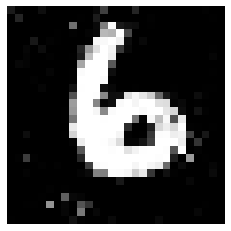

In [14]:
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
gen_imgs = 0.5 * gen_imgs + 0.5
plt.imshow(gen_imgs.reshape(28,28), cmap="gray")
plt.axis("off")
plt.show()